# Analyzing Best Selling Books - Data Visualization Portfolio Project

## Introduction

This project explores the information on the 100 top-selling books, ranked by their worldwide sales, using a range of visualizations. We will discover trends and gain insights into authors, genres, publishing trends, and reader behaviors.

#### Source

The dataset that we will use was obtained from Kaggle, Bestsellers Unveiled: Global Top Selling Books by Maria Nadeem. This dataset contains information about the world's best-selling books, with a focus on sales volume and other related details. 

#### Questions

We will be working with this list of world best-selling books to answer the following questions:
- Which publishers have the most books on the list?
- What are the most popular genres?
- Do some genres tend to sell more copies on average than others?
- Is there a correlation between the number of best-selling books an author or publishers has and their total sales?

## Import Libraries

#### Data Manipulation & Analysis

In [78]:
import pandas as pd

#### Data Visualization

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import matplotlib.transforms as mtransforms
import matplotlib.patches as mpatches
import squarify

#### Statistical Analysis

In [80]:
import scipy.stats as stats

#### Text Annotation & Adjustment

In [81]:
from adjustText import adjust_text

## Load and Inspect Data

The dataset containing the list of best-selling books is located in the 'datasets' folder.

Let's load and inspect the data of the top 100 best-selling books.

#### Load Dataset

In [82]:
books = pd.read_csv('datasets/best_selling_books.csv')

#### Inspect Dataset

In [83]:
books.head()

,Rank,Title,Author,Volume Sales,Publisher,Genre
0,1,"Da Vinci Code,The","Brown, Dan","5,094,805",Transworld,"Crime, Thriller & Adventure"
1,2,Harry Potter and the Deathly Hallows,"Rowling, J.K.","4,475,152",Bloomsbury,Children's Fiction
2,3,Harry Potter and the Philosopher's Stone,"Rowling, J.K.","4,200,654",Bloomsbury,Children's Fiction
3,4,Harry Potter and the Order of the Phoenix,"Rowling, J.K.","4,179,479",Bloomsbury,Children's Fiction
4,5,Fifty Shades of Grey,"James, E. L.","3,758,936",Random House,Romance & Sagas


In [84]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          100 non-null    int64 
 1   Title         100 non-null    object
 2   Author        100 non-null    object
 3   Volume Sales  100 non-null    object
 4   Publisher     100 non-null    object
 5   Genre         100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [85]:
books.describe(include = 'all')

,Rank,Title,Author,Volume Sales,Publisher,Genre
count,100.000000,100,100,100,100,100
unique,NaN,100,67,100,16,21
top,NaN,"Da Vinci Code,The","Rowling, J.K.","5,094,805",Random House,General & Literary Fiction
freq,NaN,1,9,1,19,33
mean,50.500000,NaN,NaN,NaN,NaN,NaN
std,29.011492,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,25.750000,NaN,NaN,NaN,NaN,NaN
50%,50.500000,NaN,NaN,NaN,NaN,NaN
75%,75.250000,NaN,NaN,NaN,NaN,NaN


In [86]:
books.Genre.unique()

array(['Crime, Thriller & Adventure', "Children's Fiction",
       'Romance & Sagas', 'Young Adult Fiction',
       'General & Literary Fiction', 'Popular Science', 'Picture Books',
       'Food & Drink: General', 'Humour: Collections & General',
       'Autobiography: General', 'Biography: The Arts',
       'Science Fiction & Fantasy', 'Fitness & Diet',
       'Usage & Writing Guides',
       'Popular Culture & Media: General Interest',
       'Autobiography: The Arts', 'Current Affairs & Issues',
       'Travel Writing', 'National & Regional Cuisine',
       "Children's Annuals", 'Biography: General'], dtype=object)

In [87]:
books.Publisher.unique()

array(['Transworld', 'Bloomsbury', 'Random House', 'Little, Brown Book',
       'Quercus', 'Pan Macmillan', 'Penguin', 'Hodder & Stoughton',
       'Canongate', 'HarperCollins', 'Orion', 'Scholastic Ltd.',
       'Headline', 'Profile Books Group',
       'Random House Childrens Books G', 'D.C. Thomson'], dtype=object)

In [88]:
books.Author.unique()

array(['Brown, Dan', 'Rowling, J.K.', 'James, E. L.', 'Meyer, Stephenie',
       'Larsson, Stieg', 'Sebold, Alice', 'Haddon, Mark', 'Bryson, Bill',
       'Carle, Eric', 'Donaldson, Julia', 'Oliver, Jamie',
       'Hosseini, Khaled', 'Nicholls, David', 'Niffenegger, Audrey',
       'McEwan, Ian', 'Fielding, Helen', 'Clarkson, Jeremy',
       'Bernieres, Louis de', 'Kay, Peter', 'Martel, Yann',
       'Stephenson, Pamela', 'Pelzer, Dave', 'McCourt, Frank',
       'Faulks, Sebastian', 'Pullman, Philip', 'Mosse, Kate',
       'Stockett, Kathryn', 'Parsons, Tony', 'Golden, Arthur',
       'McCall Smith, Alexander', 'Hislop, Victoria', 'Ahern, Cecelia',
       'McKeith, Gillian', 'Zafon, Carlos Ruiz', 'Grisham, John',
       'Atkins, Robert C.', 'Truss, Lynne', 'Smith, Delia',
       'Harris, Joanne', 'Boyne, John', 'Picoult, Jodi', 'Lee, Harper',
       'Gray, John', 'French, Dawn', 'Lewycka, Marina', 'Harris, Thomas',
       'Tolkien, J. R. R.', 'Moore, Michael', 'Rubenfeld, Jed',
       

In [89]:
books[books.Author == '0']

,Rank,Title,Author,Volume Sales,Publisher,Genre
90,91,"""Beano"" Annual,The",0,"816,585",D.C. Thomson,Children's Annuals


#### Initial Observations

- The data includes the name of the book, the author, the publisher, the genre, total number of sales and it's rank in the top 100 list.
- The `Volume Sales` column is currently of type `object` when it should be of type `int`.
- There are 21 unique `Genre` categories, which can be reduced down to broader groups to help with analysis.
- There are a handful of publishers listed that are owned by the same parent company.
- There is one book record for 'The Beano Annual' that is written by various authors, but currently lists the author as `0`.
- Some of the publisher names are very long and may make some of our visualizations difficult to read.
- Author names are currently listed in last name, first name format.

## Data Cleaning & Preparation

Before we start looking at the data, we need to clean and prepare the dataset.

Here are some updates we will be making:
- Replace any space characters in the column names with an underscore and lowercase all characters to provide easier access to columns.
- Change the data type of the `Volume Sales` column from `object` to `int`.
- Create an additional column called 'general_genre' to consolidate the number of unique genre categories into larger groups.  This will improve trend analysis while maintaining meaningful distinctions between groups.
- Create an additional column named `parent_company`, which will group together publishers that are owned by the same company and list them as `Independent` if there is no parent company.
- Replace any instances where `Author` is `0` to have a value of `Various Authors`.
- Create a new column that includes an abbreviated version of the publishers name to make it more concise for use in our visualizations.
- Extract the first and last name from the `author` column to create new columns called `first_name` and `last_name`. Use those new columns to concatenate the values to create a `full_name` column. This will help with visualizations.
- Create individual dataframes that group by the following columns; `general_genre`, `publisher_abbrev`, `parent_company`, and `author`. Each dataframe will include the total number of books, the sum of volume sales, and some additional features that pertain to each individual topic.
- Create color palettes to use on our charts and graphs to make them visually engaging. 

#### Optimizing Features

In [90]:
# Replace spaces with underscore and lowercase all characters in column names
books.columns = books.columns.str.replace(' ', '_').str.lower()
books.columns

Index(['rank', 'title', 'author', 'volume_sales', 'publisher', 'genre'], dtype='object')

In [91]:
# Change data type of 'volume_sales' from 'object' to 'int'
books.volume_sales = books.volume_sales.str.replace(',', '').astype('int')
books.volume_sales.dtype

dtype('int64')

In [92]:
# Replace values of '0' in author column with 'Various Authors'
books.author = books.author.replace('0', 'Various Authors')
books[books.author.str.contains('0')]

,rank,title,author,volume_sales,publisher,genre


#### Generating New Features

In [93]:
# Create broader genre groups through mapping

# Define the genre mapping
genre_mapping = {
    'Crime, Thriller & Adventure': 'Thriller & Mystery',
    'Science Fiction & Fantasy': 'Science Fiction & Fantasy',
    "Children's Fiction": "Children's Books",
    'Picture Books': "Children's Books",
    "Children's Annuals": "Children's Books",
    'Young Adult Fiction': 'Young Adult',
    'Romance & Sagas': 'Romance',
    'General & Literary Fiction': 'Fiction',
    'Popular Science': 'Non-Fiction',
    'Travel Writing': 'Non-Fiction',
    'Current Affairs & Issues': 'Non-Fiction',
    'Popular Culture & Media: General Interest': 'Non-Fiction',
    'Autobiography: General': 'Biography & Memoir',
    'Biography: The Arts': 'Biography & Memoir',
    'Autobiography: The Arts': 'Biography & Memoir',
    'Biography: General': 'Biography & Memoir',
    'Humour: Collections & General': 'Lifestyle & Entertainment',
    'Food & Drink: General': 'Lifestyle & Entertainment',
    'National & Regional Cuisine': 'Lifestyle & Entertainment',
    'Fitness & Diet': 'Lifestyle & Entertainment',
    'Usage & Writing Guides': 'Lifestyle & Entertainment'
}

# Map the original genres to the list of general genres
books['general_genre'] = books.genre.map(genre_mapping)
books.head()

,rank,title,author,volume_sales,publisher,genre,general_genre
0,1,"Da Vinci Code,The","Brown, Dan",5094805,Transworld,"Crime, Thriller & Adventure",Thriller & Mystery
1,2,Harry Potter and the Deathly Hallows,"Rowling, J.K.",4475152,Bloomsbury,Children's Fiction,Children's Books
2,3,Harry Potter and the Philosopher's Stone,"Rowling, J.K.",4200654,Bloomsbury,Children's Fiction,Children's Books
3,4,Harry Potter and the Order of the Phoenix,"Rowling, J.K.",4179479,Bloomsbury,Children's Fiction,Children's Books
4,5,Fifty Shades of Grey,"James, E. L.",3758936,Random House,Romance & Sagas,Romance


In [94]:
# Create a column based on parent company through mapping

# Define the publisher mapping
parent_company_mapping = {
    'Transworld': 'Penguin Random House',
    'Random House': 'Penguin Random House',
    'Random House Childrens Books G': 'Penguin Random House',
    'Penguin': 'Penguin Random House',
    
    'Little, Brown Book': 'Hachette Livre',
    'Hodder & Stoughton': 'Hachette Livre',
    'Orion': 'Hachette Livre',
    'Headline': 'Hachette Livre',
    'Quercus': 'Hachette Livre',
    
    'Pan Macmillan': 'Holtzbrinck Publishing',
    
    'HarperCollins': 'News Corp',
    
    'Scholastic Ltd.': 'Scholastic Corporation',
    
    'Bloomsbury': 'Independent',
    'Canongate': 'Independent',
    'Profile Books Group': 'Independent',
    'D.C. Thomson': 'Independent'
}

# Map the publisher to the list of parent companies
books['parent_company'] = books.publisher.map(parent_company_mapping)
books.head()

,rank,title,author,volume_sales,publisher,genre,general_genre,parent_company
0,1,"Da Vinci Code,The","Brown, Dan",5094805,Transworld,"Crime, Thriller & Adventure",Thriller & Mystery,Penguin Random House
1,2,Harry Potter and the Deathly Hallows,"Rowling, J.K.",4475152,Bloomsbury,Children's Fiction,Children's Books,Independent
2,3,Harry Potter and the Philosopher's Stone,"Rowling, J.K.",4200654,Bloomsbury,Children's Fiction,Children's Books,Independent
3,4,Harry Potter and the Order of the Phoenix,"Rowling, J.K.",4179479,Bloomsbury,Children's Fiction,Children's Books,Independent
4,5,Fifty Shades of Grey,"James, E. L.",3758936,Random House,Romance & Sagas,Romance,Penguin Random House


In [95]:
# Create a column to abbreviate long publisher names

# Define mapping of original publisher names to their abbreviations
publisher_abbreviations = {
    'Little, Brown Book': 'Little Brown',
    'Hodder & Stoughton': 'Hodder',
    'Scholastic Ltd.': 'Scholastic',
    'Profile Books Group': 'Profile Books',
    'Random House Childrens Books G': 'Random House Kids'
}

# Replace the publisher names with with abbreviations
books['publisher_abbrev'] = books.publisher.replace(publisher_abbreviations)
books.publisher_abbrev.unique()

array(['Transworld', 'Bloomsbury', 'Random House', 'Little Brown',
       'Quercus', 'Pan Macmillan', 'Penguin', 'Hodder', 'Canongate',
       'HarperCollins', 'Orion', 'Scholastic', 'Headline',
       'Profile Books', 'Random House Kids', 'D.C. Thomson'], dtype=object)

In [96]:
books['first_name'] = books.author.str.split(', ', expand = True)[1]
books['last_name'] = books.author.str.split(', ', expand = True)[0]
books['full_name'] = books.first_name + ' ' + books.last_name
books.head()

,rank,title,author,volume_sales,publisher,genre,general_genre,parent_company,publisher_abbrev,first_name,last_name,full_name
0,1,"Da Vinci Code,The","Brown, Dan",5094805,Transworld,"Crime, Thriller & Adventure",Thriller & Mystery,Penguin Random House,Transworld,Dan,Brown,Dan Brown
1,2,Harry Potter and the Deathly Hallows,"Rowling, J.K.",4475152,Bloomsbury,Children's Fiction,Children's Books,Independent,Bloomsbury,J.K.,Rowling,J.K. Rowling
2,3,Harry Potter and the Philosopher's Stone,"Rowling, J.K.",4200654,Bloomsbury,Children's Fiction,Children's Books,Independent,Bloomsbury,J.K.,Rowling,J.K. Rowling
3,4,Harry Potter and the Order of the Phoenix,"Rowling, J.K.",4179479,Bloomsbury,Children's Fiction,Children's Books,Independent,Bloomsbury,J.K.,Rowling,J.K. Rowling
4,5,Fifty Shades of Grey,"James, E. L.",3758936,Random House,Romance & Sagas,Romance,Penguin Random House,Random House,E. L.,James,E. L. James


In [97]:
books.first_name.unique()

array(['Dan', 'J.K.', 'E. L.', 'Stephenie', 'Stieg', 'Alice', 'Mark',
       'Bill', 'Eric', 'Julia', 'Jamie', 'Khaled', 'David', 'Audrey',
       'Ian', 'Helen', 'Jeremy', 'Louis de', 'Peter', 'Yann', 'Pamela',
       'Dave', 'Frank', 'Sebastian', 'Philip', 'Kate', 'Kathryn', 'Tony',
       'Arthur', 'Alexander', 'Victoria', 'Cecelia', 'Gillian',
       'Carlos Ruiz', 'John', 'Robert C.', 'Lynne', 'Delia', 'Joanne',
       'Jodi', 'Harper', 'Dawn', 'Marina', 'Thomas', 'J. R. R.',
       'Michael', 'Jed', 'Sharon', 'Paulo', 'Paul', 'Andrea', 'Nigella',
       'Monica', 'Kim', 'Nick', 'Russell', 'Richard', None, 'Zadie',
       'Markus', 'Maeve', 'Robert', 'Suzanne'], dtype=object)

In [98]:
books.last_name.unique()

array(['Brown', 'Rowling', 'James', 'Meyer', 'Larsson', 'Sebold',
       'Haddon', 'Bryson', 'Carle', 'Donaldson', 'Oliver', 'Hosseini',
       'Nicholls', 'Niffenegger', 'McEwan', 'Fielding', 'Clarkson',
       'Bernieres', 'Kay', 'Martel', 'Stephenson', 'Pelzer', 'McCourt',
       'Faulks', 'Pullman', 'Mosse', 'Stockett', 'Parsons', 'Golden',
       'McCall Smith', 'Hislop', 'Ahern', 'McKeith', 'Zafon', 'Grisham',
       'Atkins', 'Truss', 'Smith', 'Harris', 'Boyne', 'Picoult', 'Lee',
       'Gray', 'French', 'Lewycka', 'Tolkien', 'Moore', 'Rubenfeld',
       'Osbourne', 'Coelho', "O'Grady", 'McKenna', 'Levy', 'Lawson',
       'Ali', 'Edwards', 'Hornby', 'Brand', 'Dawkins', 'Various Authors',
       'Morton', 'Zusak', 'Binchy', 'Collins'], dtype=object)

#### Developing Color Schemes for Graphs

In [99]:
classic_palette = ['#2E3B4E',  # Deep Blue-Gray  
                   '#B86B52',  # Warm Brick Red  
                   '#D9A84C',  # Muted Gold  
                   '#8C6A5D',  # Desaturated Brown  
                   '#4F6D7A',  # Cool Slate Blue  
                   '#E2C799',  # Soft Sand  
                   '#6B8E23',  # Olive Green  
                   '#A05A2C',  # Burnt Orange  
                   '#5D576B']  # Dusty Purple  

In [100]:
sns.color_palette(classic_palette)

[(0.1803921568627451, 0.23137254901960785, 0.3058823529411765),
 (0.7215686274509804, 0.4196078431372549, 0.3215686274509804),
 (0.8509803921568627, 0.6588235294117647, 0.2980392156862745),
 (0.5490196078431373, 0.41568627450980394, 0.36470588235294116),
 (0.30980392156862746, 0.42745098039215684, 0.47843137254901963),
 (0.8862745098039215, 0.7803921568627451, 0.6),
 (0.4196078431372549, 0.5568627450980392, 0.13725490196078433),
 (0.6274509803921569, 0.35294117647058826, 0.17254901960784313),
 (0.36470588235294116, 0.3411764705882353, 0.4196078431372549)]

#### Group and Aggregate Data

In [101]:
# Get the number of books and total volume sales for each genre group
genre_data = books.groupby('general_genre').agg(num_books = ('title', 'count'), volume_sales = ('volume_sales', 'sum')).reset_index()

# Map a color to each genre
genre_data['color'] = classic_palette
genre_data.head()

,general_genre,num_books,volume_sales,color
0,Biography & Memoir,9,9467893,#2E3B4E
1,Children's Books,13,33774199,#B86B52
2,Fiction,33,38469803,#D9A84C
3,Lifestyle & Entertainment,12,12616289,#8C6A5D
4,Non-Fiction,6,6448184,#4F6D7A


In [102]:
# Get the number of books and total volume sales by each publisher
publisher_data = books.groupby(['parent_company', 'publisher_abbrev']).agg(num_books = ('title', 'count'), volume_sales = ('volume_sales', 'sum')).reset_index()
publisher_data['avg_sales_per_book'] = publisher_data.volume_sales / publisher_data.num_books
publisher_data.head()

,parent_company,publisher_abbrev,num_books,volume_sales,avg_sales_per_book
0,Hachette Livre,Headline,3,2940502,9.801673e+05
1,Hachette Livre,Hodder,3,3440411,1.146804e+06
2,Hachette Livre,Little Brown,6,10383181,1.730530e+06
3,Hachette Livre,Orion,5,5091561,1.018312e+06
4,Hachette Livre,Quercus,3,5603489,1.867830e+06


In [103]:
# Get the number bof books and total volume sales for each parent company
parent_data = books.groupby('parent_company').agg(num_books = ('title', 'count'), volume_sales = ('volume_sales', 'sum')).reset_index()

# Map a color to each parent company
parent_data['color'] = classic_palette[:6]
parent_data.head()

,parent_company,num_books,volume_sales,color
0,Hachette Livre,20,27459144,#2E3B4E
1,Holtzbrinck Publishing,7,9085383,#B86B52
2,Independent,14,34858305,#D9A84C
3,News Corp,7,7590622,#8C6A5D
4,Penguin Random House,48,66720581,#4F6D7A


In [104]:
# Get the number of books and total volume sales for each author
author_data = books.groupby('author').agg(num_books = ('title', 'count'), volume_sales = ('volume_sales', 'sum'), first_name = ('first_name', 'first'), last_name = ('last_name', 'first'), full_name = ('full_name', 'first'), best_rank = ('rank', 'min')).reset_index()
author_data['avg_sales_per_book'] = author_data.volume_sales / author_data.num_books
author_data.head()

,author,num_books,volume_sales,first_name,last_name,full_name,best_rank,avg_sales_per_book
0,"Ahern, Cecelia",1,1107379,Cecelia,Ahern,Cecelia Ahern,52,1107379.0
1,"Ali, Monica",1,856540,Monica,Ali,Monica Ali,85,856540.0
2,"Atkins, Robert C.",1,1054196,Robert C.,Atkins,Robert C. Atkins,57,1054196.0
3,"Bernieres, Louis de",1,1352318,Louis de,Bernieres,Louis de Bernieres,36,1352318.0
4,"Binchy, Maeve",1,808900,Maeve,Binchy,Maeve Binchy,95,808900.0


#### Evaluating Cleaned DataFrames

In [105]:
# Review our cleaned up dataset
books.head()

,rank,title,author,volume_sales,publisher,genre,general_genre,parent_company,publisher_abbrev,first_name,last_name,full_name
0,1,"Da Vinci Code,The","Brown, Dan",5094805,Transworld,"Crime, Thriller & Adventure",Thriller & Mystery,Penguin Random House,Transworld,Dan,Brown,Dan Brown
1,2,Harry Potter and the Deathly Hallows,"Rowling, J.K.",4475152,Bloomsbury,Children's Fiction,Children's Books,Independent,Bloomsbury,J.K.,Rowling,J.K. Rowling
2,3,Harry Potter and the Philosopher's Stone,"Rowling, J.K.",4200654,Bloomsbury,Children's Fiction,Children's Books,Independent,Bloomsbury,J.K.,Rowling,J.K. Rowling
3,4,Harry Potter and the Order of the Phoenix,"Rowling, J.K.",4179479,Bloomsbury,Children's Fiction,Children's Books,Independent,Bloomsbury,J.K.,Rowling,J.K. Rowling
4,5,Fifty Shades of Grey,"James, E. L.",3758936,Random House,Romance & Sagas,Romance,Penguin Random House,Random House,E. L.,James,E. L. James


In [106]:
books.describe(include = 'all')

,rank,title,author,volume_sales,publisher,genre,general_genre,parent_company,publisher_abbrev,first_name,last_name,full_name
count,100.000000,100,100,1.000000e+02,100,100,100,100,100,99,100,99
unique,NaN,100,67,NaN,16,21,9,6,16,62,64,66
top,NaN,"Da Vinci Code,The","Rowling, J.K.",NaN,Random House,General & Literary Fiction,Fiction,Penguin Random House,Random House,J.K.,Rowling,J.K. Rowling
freq,NaN,1,9,NaN,19,33,33,48,19,9,9,9
mean,50.500000,NaN,NaN,1.497272e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,29.011492,NaN,NaN,9.077396e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,7.910950e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,25.750000,NaN,NaN,9.420580e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,50.500000,NaN,NaN,1.111938e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,75.250000,NaN,NaN,1.781836e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that we have cleaned and prepped our book dataset, we can start answering our initial questions through data visualization.

## Data Visualizations

### What are the most popular genres?

In order to figure out which genres are most common in the top 100 bestsellers, we need to look at the genres of each book on the list. We'll group the books by genre and count how many titles there are for each genre. Then, we'll present this information in a horizontal bar graph, displaying the number of books in each genre.

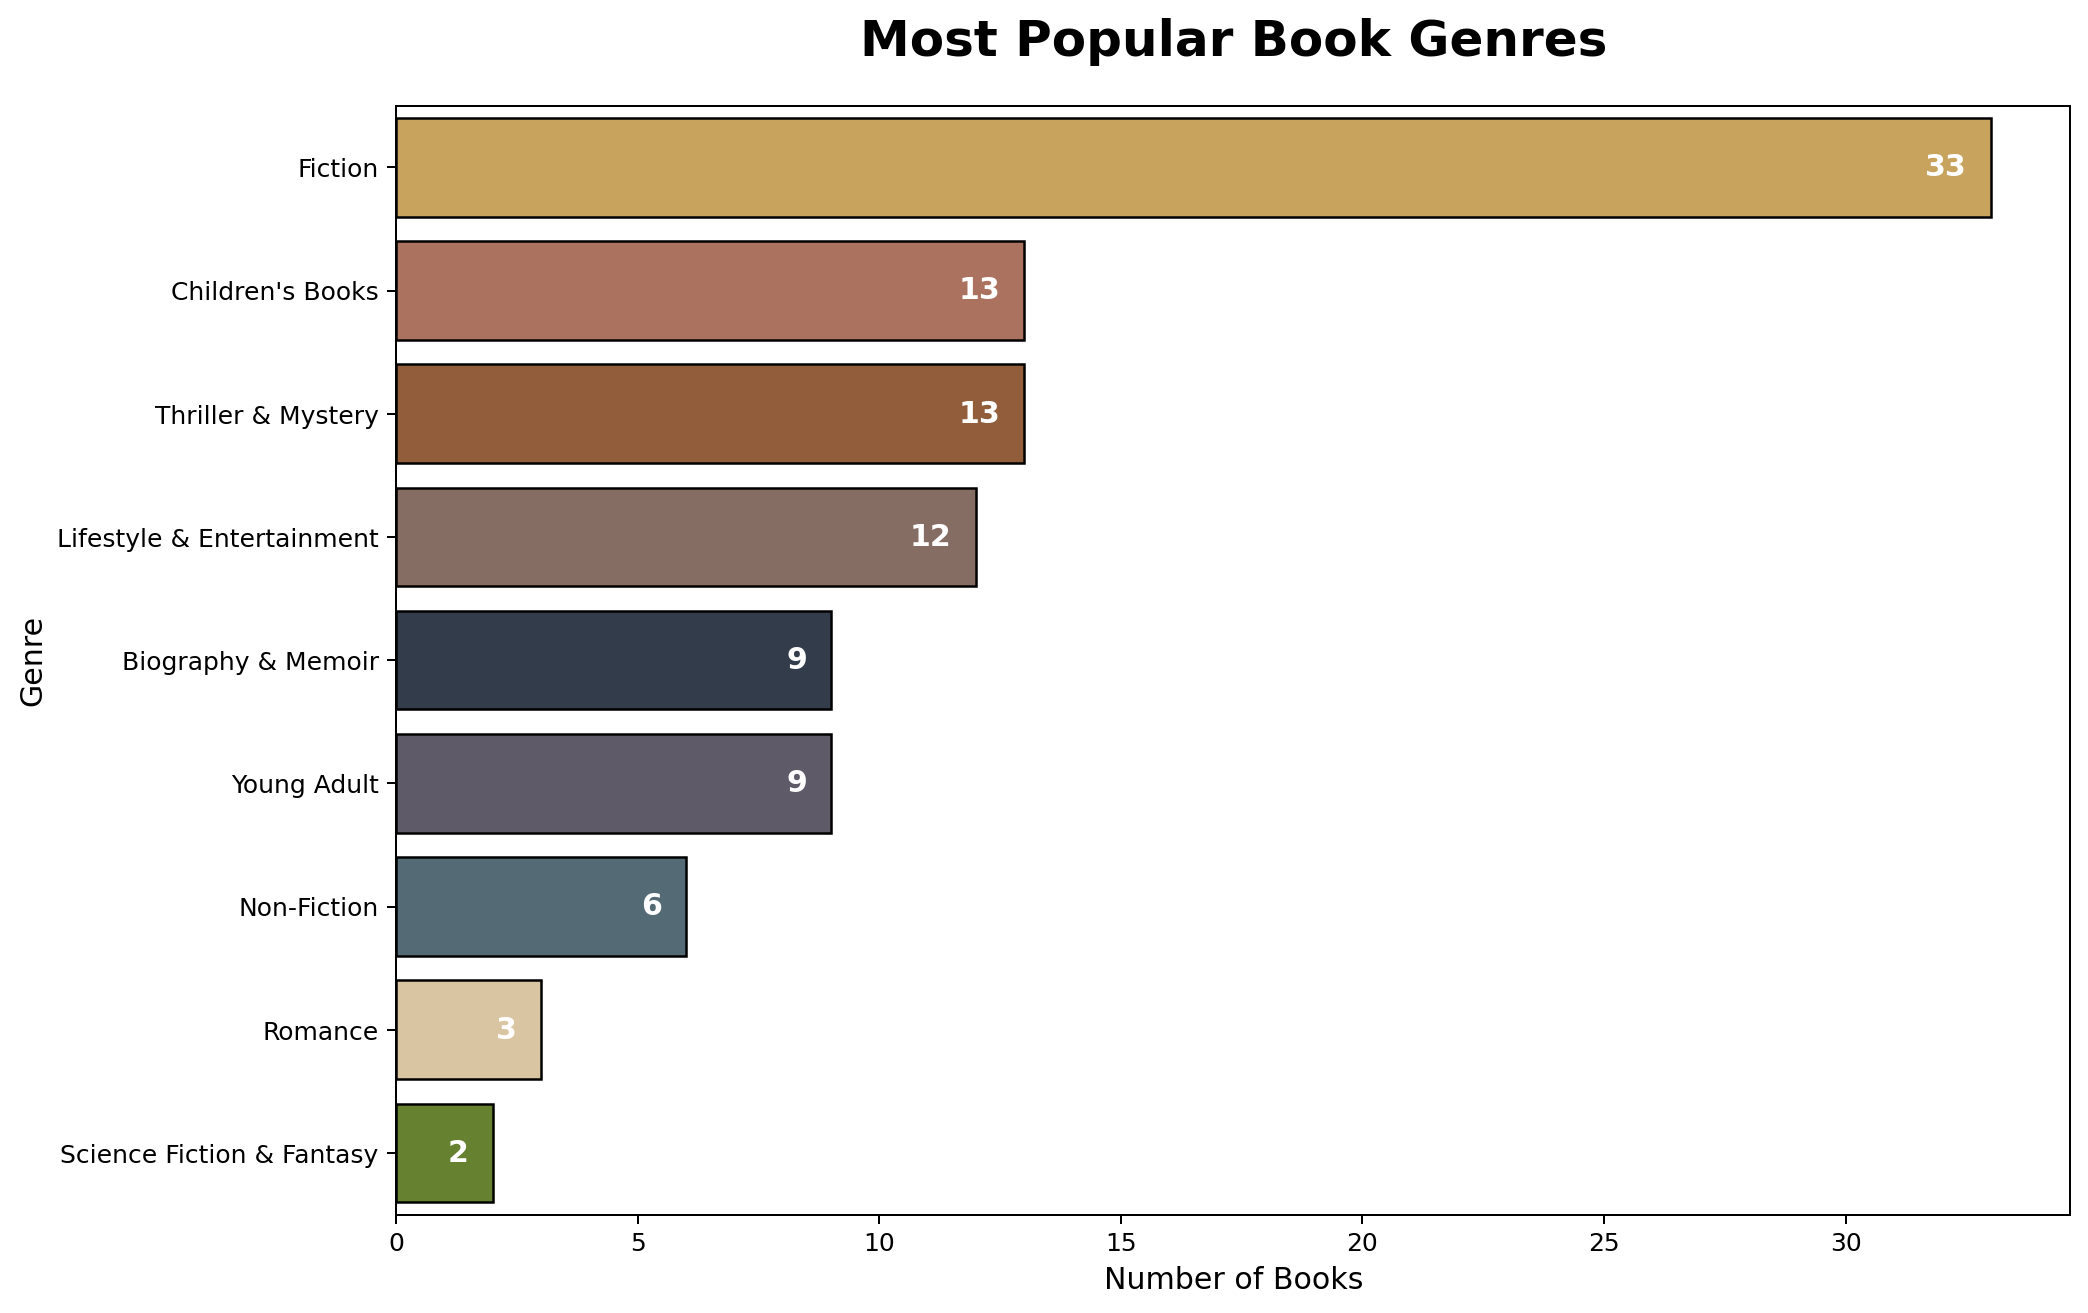

In [107]:
plt.figure(figsize = (12,8), dpi = 180)

# Create dataframe sorted by number of books
gen_book_sorted = genre_data.sort_values(by = 'num_books', ascending = False)

# Plot a bar graph with the number of books each genre has in top 100
genre_bar = sns.barplot(data = gen_book_sorted, y = 'general_genre', x = 'num_books', hue = 'general_genre', palette = dict(zip(genre_data.general_genre, genre_data.color)), edgecolor = 'black')
genre_bar.set_title('Most Popular Book Genres', fontsize = 20, fontweight = 'bold', pad = 20)
genre_bar.set_ylabel('Genre', fontsize = 12)
genre_bar.set_xlabel('Number of Books', fontsize = 12)

# Annotate bars with exact values
for p in genre_bar.patches:
    genre_bar.annotate(f'{p.get_width():.0f}', (p.get_width() - 0.5, p.get_y() + p.get_height() / 2), ha = 'right', va = 'center', fontsize = 12, color = 'white', fontweight = 'bold')

plt.show()

The bar graph above clearly shows that fiction novels make up the largest percentage of the top 100 bestsellers, accounting for almost one-third of all titles. Following closely behind are children's novels, thrillers, and mysteries, which have similar popularity rates. Interestingly, science fiction and fantasy seem to be less popular, with only two titles on the list.

### Do some genres tend to generate more total sales than others?

Some book genres may not appear often on bestseller lists but could still generate significant sales. To find out, we will examine the total number of copies sold within each general genre. We will use a horizontal bar graph to display the results, similar to the previous graph showing the number of books by genre. This consistency will make it easier to compare both graphs and notice any pattern changes, such as genres that sell well despite having fewer titles or those that are common on the list but contribute less to overall sales.

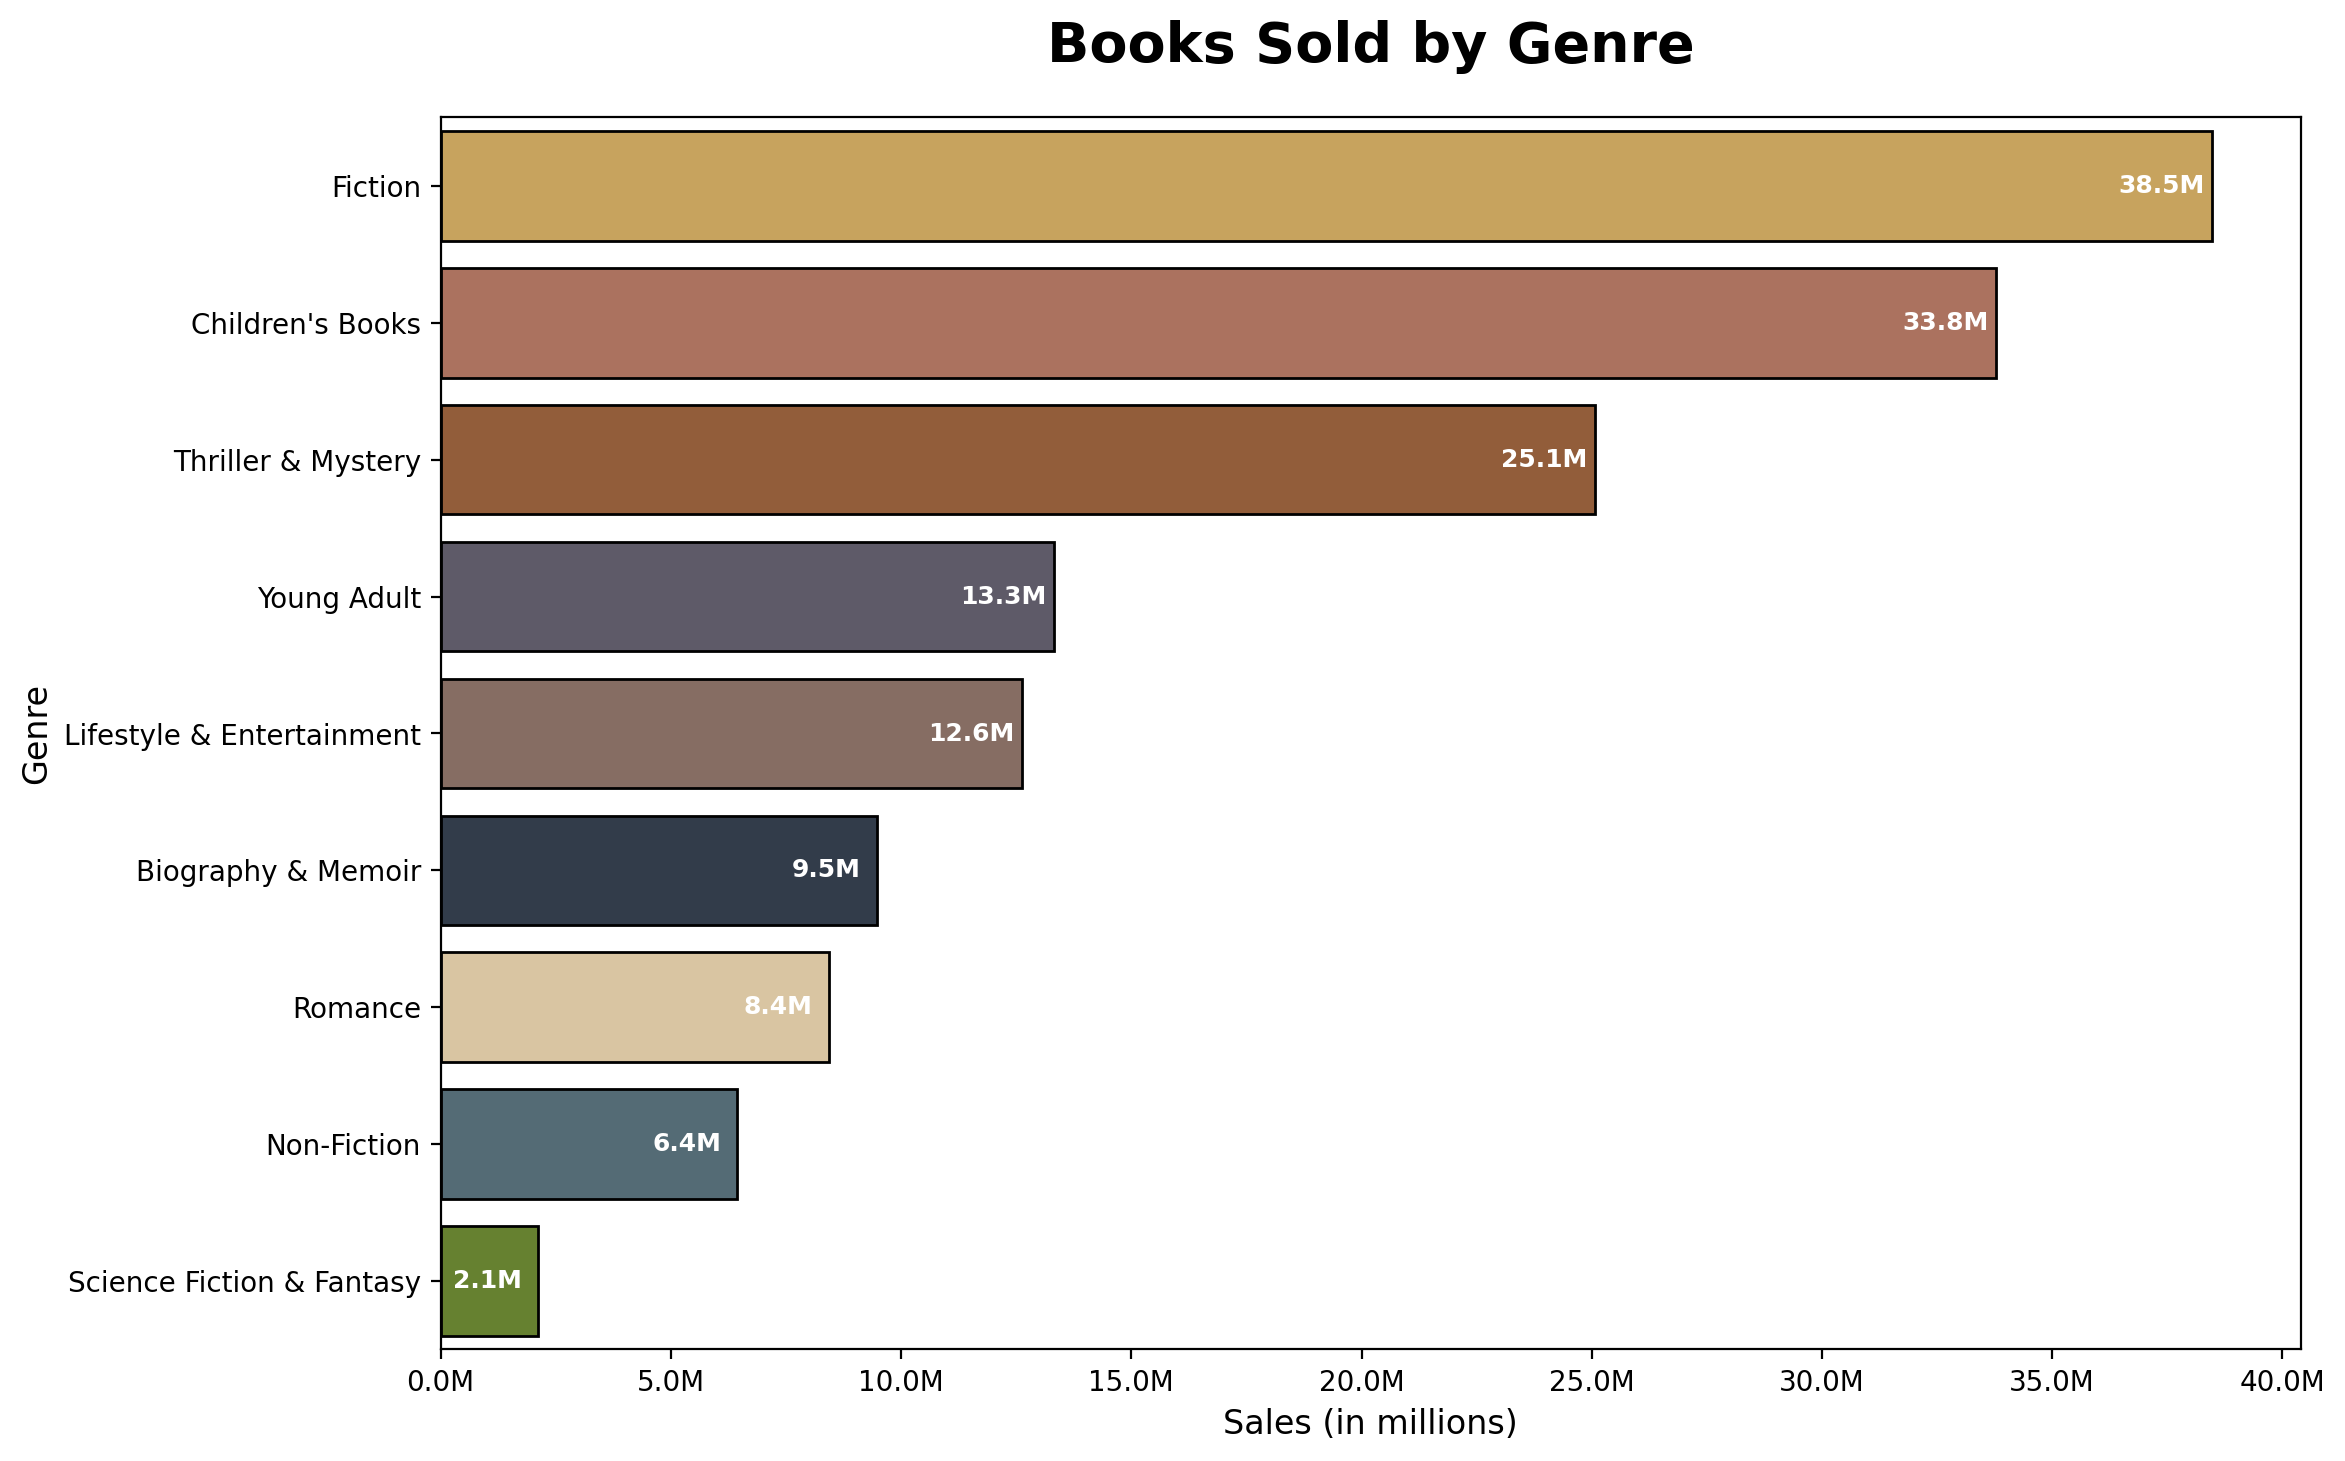

In [108]:
plt.figure(figsize = (12,8), dpi = 200)

# Create dataframe sorted by volume sales
gen_sale_sorted = genre_data.sort_values(by = 'volume_sales', ascending = False)

# Plot a bar graph with the total sales of each genre
genre_bar2 = sns.barplot(data = gen_sale_sorted, y = 'general_genre', x = 'volume_sales', hue = 'general_genre', palette = dict(zip(genre_data.general_genre, genre_data.color)), edgecolor = 'black')
genre_bar2.set_title('Books Sold by Genre', fontsize = 20, fontweight = 'bold', pad = 20)
genre_bar2.set_ylabel('Genre', fontsize = 12)
genre_bar2.set_xlabel('Sales (in millions)', fontsize = 12)

# Define function to format sales numbers in millions
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'
genre_bar2.xaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

# Annotate bars with sales numbers
for p in genre_bar2.patches:
    genre_bar2.annotate(f'{p.get_width() / 1e6:.1f}M', (p.get_width() - 1.1e6, p.get_y() + p.get_height() / 2),  # Adjust position
                ha='center', va='center', fontsize=9, color='white', fontweight='bold')


plt.show()

The genre rankings remain largely consistent between our graph of 'Most Popular Book Genres' and 'Books Sold by Genre'. *Fiction*, *Children's Books*, *Thriller & Mystery*, and *Science Fiction & Fantasy* retained their original placements, while the remaining genres shifted by only one or two spots. 

However, the gap between the top two genres, *Fiction* and *Children's Books*, is less pronounced in the sales graph. *Fiction* led with 38.5 million, while *Children's Books* followed closely with 33.8 million, a difference of just 5 million. This suggests that while *Children's Books* had fewer entries on the list, some individual titles were exceptionally successful. 

### Which publishers have the most books on the list?

To effectively answer this question, we can visualize the number of books contributed by each publisher using a bar graph. 

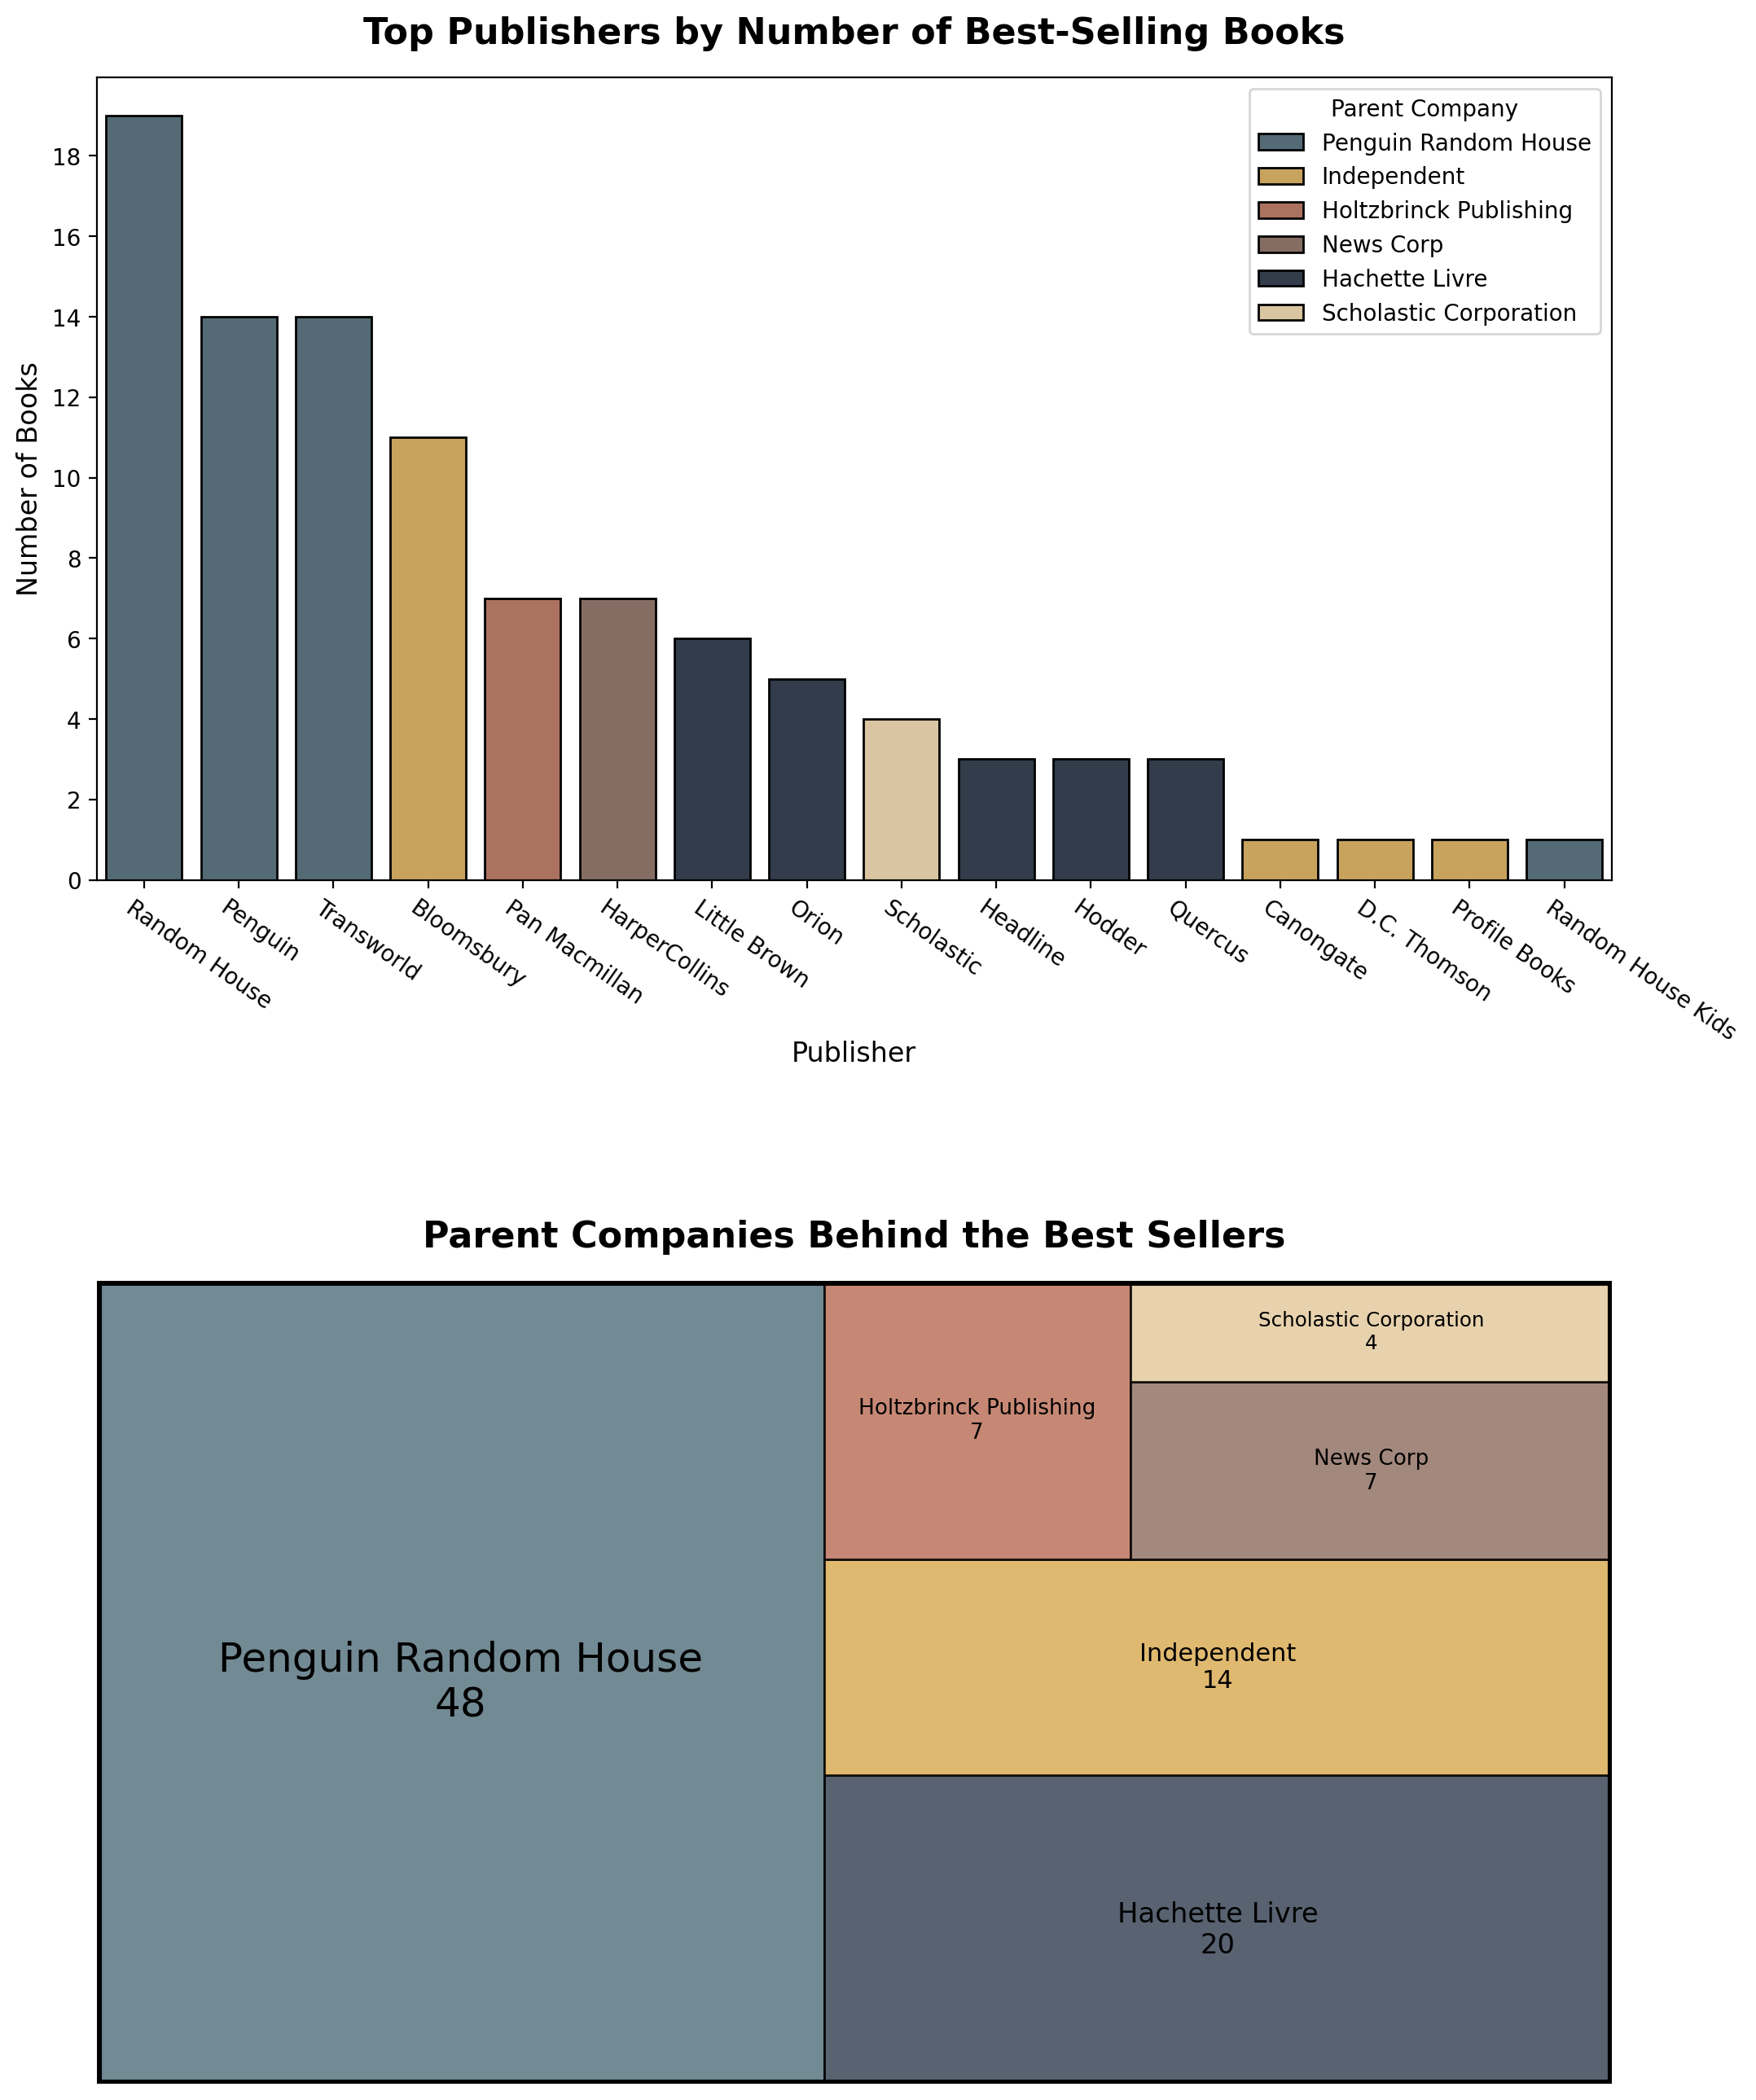

In [109]:
plt.figure(figsize = (12,16), dpi = 200)
#fig, ax = plt.subplots()
# Create dataframe sorted by number of books
pub_book_sorted = publisher_data.sort_values(by = 'num_books', ascending = False)

# Plot bar graph with the number of books each publisher has in top 100 list
publish_bar = plt.subplot(2, 1, 1)
sns.barplot(data = pub_book_sorted, x = 'publisher_abbrev', y = 'num_books', hue = 'parent_company', palette = dict(zip(parent_data.parent_company, parent_data.color)), edgecolor = 'black')
fig = publish_bar.get_figure()

publish_bar.set_title('Top Publishers by Number of Best-Selling Books', fontsize = 16, fontweight = 'bold', pad = 15)
publish_bar.set_xlabel('Publisher', fontsize = 12)
publish_bar.set_ylabel('Number of Books', fontsize = 12)
publish_bar.xaxis.set_label_coords(0.5, -0.2)
publish_bar.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
publish_bar.legend(title = 'Parent Company')

# Offset x-tick labels
dx = -10 / 72
dy = 0
offset = mtransforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in publish_bar.get_xticklabels():
    label.set_horizontalalignment('left')
    label.set_transform(label.get_transform() + offset)
plt.xticks(rotation = -35)


# Plot squarify chart with the number of books each parent company has in top 100
parent_squarify = plt.subplot(2, 1, 2)
par_book_sorted = parent_data.sort_values(by = 'num_books', ascending = False)

# Generate labels with company name + number of books
labels = [f"{company}\n{num}" for company, num in zip(par_book_sorted.parent_company, par_book_sorted.num_books)]

# Create squiarify chart
parent_squarify = squarify.plot(sizes = par_book_sorted.num_books, label = labels, color = par_book_sorted.color, alpha = 0.8, edgecolor='black', linewidth = 1)

# Scale fontsize based on number of books from each company
min_font = 8  # Minimum font size
max_font = 18  # Maximum font size
scaled_fontsizes = min_font + (par_book_sorted.num_books / par_book_sorted.num_books.max()) * (max_font - min_font) # Scale based on number of books
for i, text in enumerate(parent_squarify.texts):
    text.set_fontsize(scaled_fontsizes.iloc[i]) 

# Get the limits of the treemap
x_min, x_max = parent_squarify.get_xlim()
y_min, y_max = parent_squarify.get_ylim()

# Add an outer border using a rectangle
border_rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, edgecolor='black', linewidth=4, fill=False)
parent_squarify.add_patch(border_rect)

parent_squarify.set_title('Parent Companies Behind the Best Sellers', fontsize = 16, fontweight = 'bold', pad = 15)    
parent_squarify.axis('off')

plt.subplots_adjust(hspace = 0.5)
plt.show()

According to the data, Random House is the most dominant publisher, accounting for 19 of the top 100 best-sellers. Notably, the top three publishers, all subsidiaries of Penguin Random House, collectively account for 48 books on this list.

### Which authors have the highest total sales?

The top 100 best-seller book rankings are determined by the total volume sales of a book. Is the same true when looking at the total volume sales by an author, does their highest rank correlate with the total number of books they've sold?

We'll look at the top performing authors in terms of total sales and how they compare to some of the other authors on the list, while also listing the peak rank that an author was able to obtain from a single book.

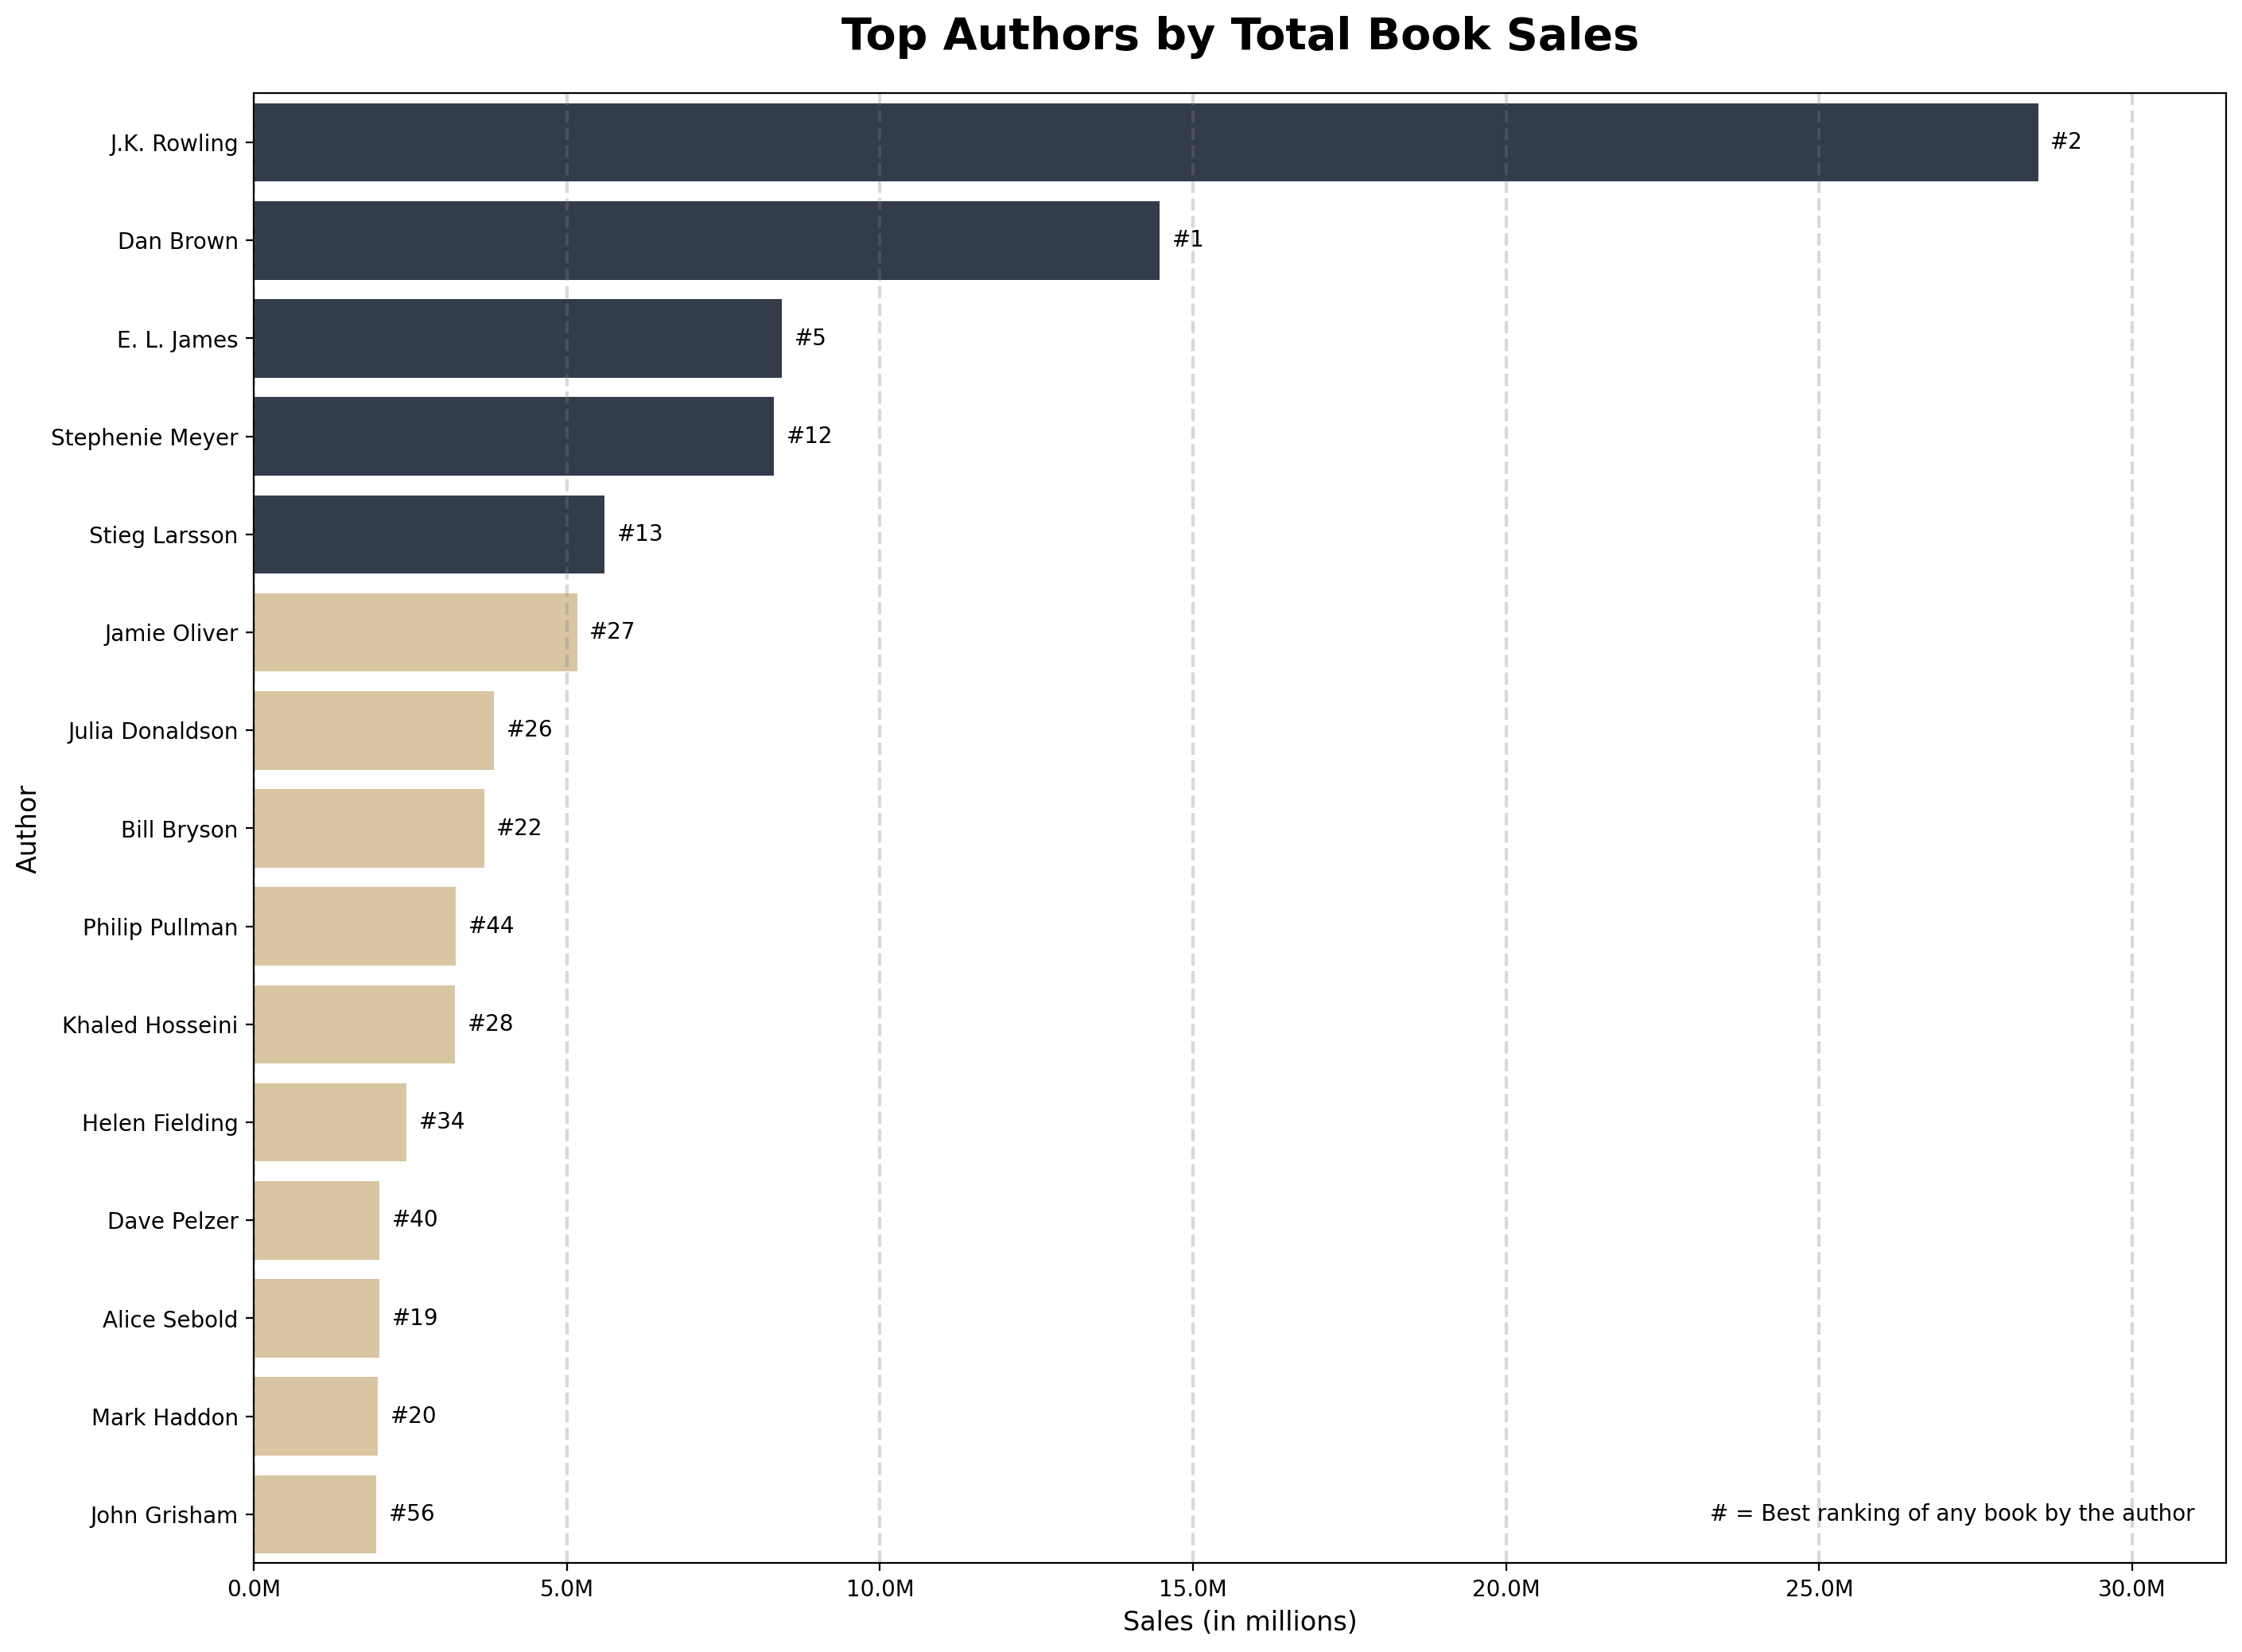

In [151]:
plt.figure(figsize = (16,12), dpi = 200)

top_5_sales_threshold = author_data.sort_values(by='volume_sales', ascending=False).head(5).volume_sales

author_data['top_5_sales'] = author_data.volume_sales.apply(lambda x: True if x >= top_5_sales_threshold.min() else False)

# Sort author_data by volume sales, only keeping the top 15
top_auth_sale_sorted = author_data.sort_values(by = 'volume_sales', ascending = False).head(15).reset_index(drop = True)

# Assign color based on value of top_5_sales column
palette = {False: classic_palette[5], True: classic_palette[0]}

# Plot bar graph with top 15 authors in terms of volume sales
top15_total_bar = sns.barplot(data = top_auth_sale_sorted, y = 'full_name', x = 'volume_sales', hue = 'top_5_sales', palette= palette, legend = False)

for index, row in top_auth_sale_sorted.iterrows():
    top15_total_bar.text(row['volume_sales'] + 0.2e6, index, f"#{row['best_rank']}", va='center', fontsize=10, color="black")
top15_total_bar.text(23.25e6, 14, f'# = Best ranking of any book by the author', va = 'center')        
top15_total_bar.set_title('Top Authors by Total Book Sales', fontsize = 20, fontweight = 'bold', pad = 20)
top15_total_bar.set_xlabel('Sales (in millions)', fontsize = 12)
top15_total_bar.set_ylabel('Author', fontsize = 12)
top15_total_bar.xaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))
xticks = plt.xticks()[0]
for xtick in xticks:
    plt.axvline(x=xtick, color='gray', linestyle='dashed', alpha=0.3)  # Add lines at x-tick positions

plt.show()

In the graph above, the top 15 authors in terms of total book sales appear. There are 6 authors whose sales have totaled more than 5 million books. As highlighted in blue, they are J.K. Rowling, Dan Brown, E.L. James, Stephanie Meyer, Stieg Larsson, and Jamie Oliver. We can see that the difference in sales between J.K. Rowling and the runner up, Dan Brown, is close to 15 million, almost double the number of sales. 

An interesting point to make is that the best-ranked books for each author are not always consistent with their total volume sales. For instance,  J.K. Rowling's highest-selling book was ranked number two, despite having the most sales, whereas Dan Brown's book holds the number one spot while having significantly fewer sales. Similarly, Alice Sebold and Mark Haddon placed at the bottom of the top 15 even though their highest-ranked books outperformed a majority of those on this list.

These observations raise a few questions. How can an author have such a high-ranking book yet still trail behind other authors in overall sales? Conversely, how can an author have such an overwhelming number of sales but not have the highest-ranked book? Was their success the result of a single well-performing book or several releases? Are other authors with fewer titles on the list undervalued, despite their high sales? 

### Which authors sell the most per book, and how does that differ from total sales rankings?

Let's look at a similar graph, but instead of looking at the total volume sales, we'll use the average number of sales per book, while continuing to highlight the same authors with the highest total sales so we can see if there are any shifts.

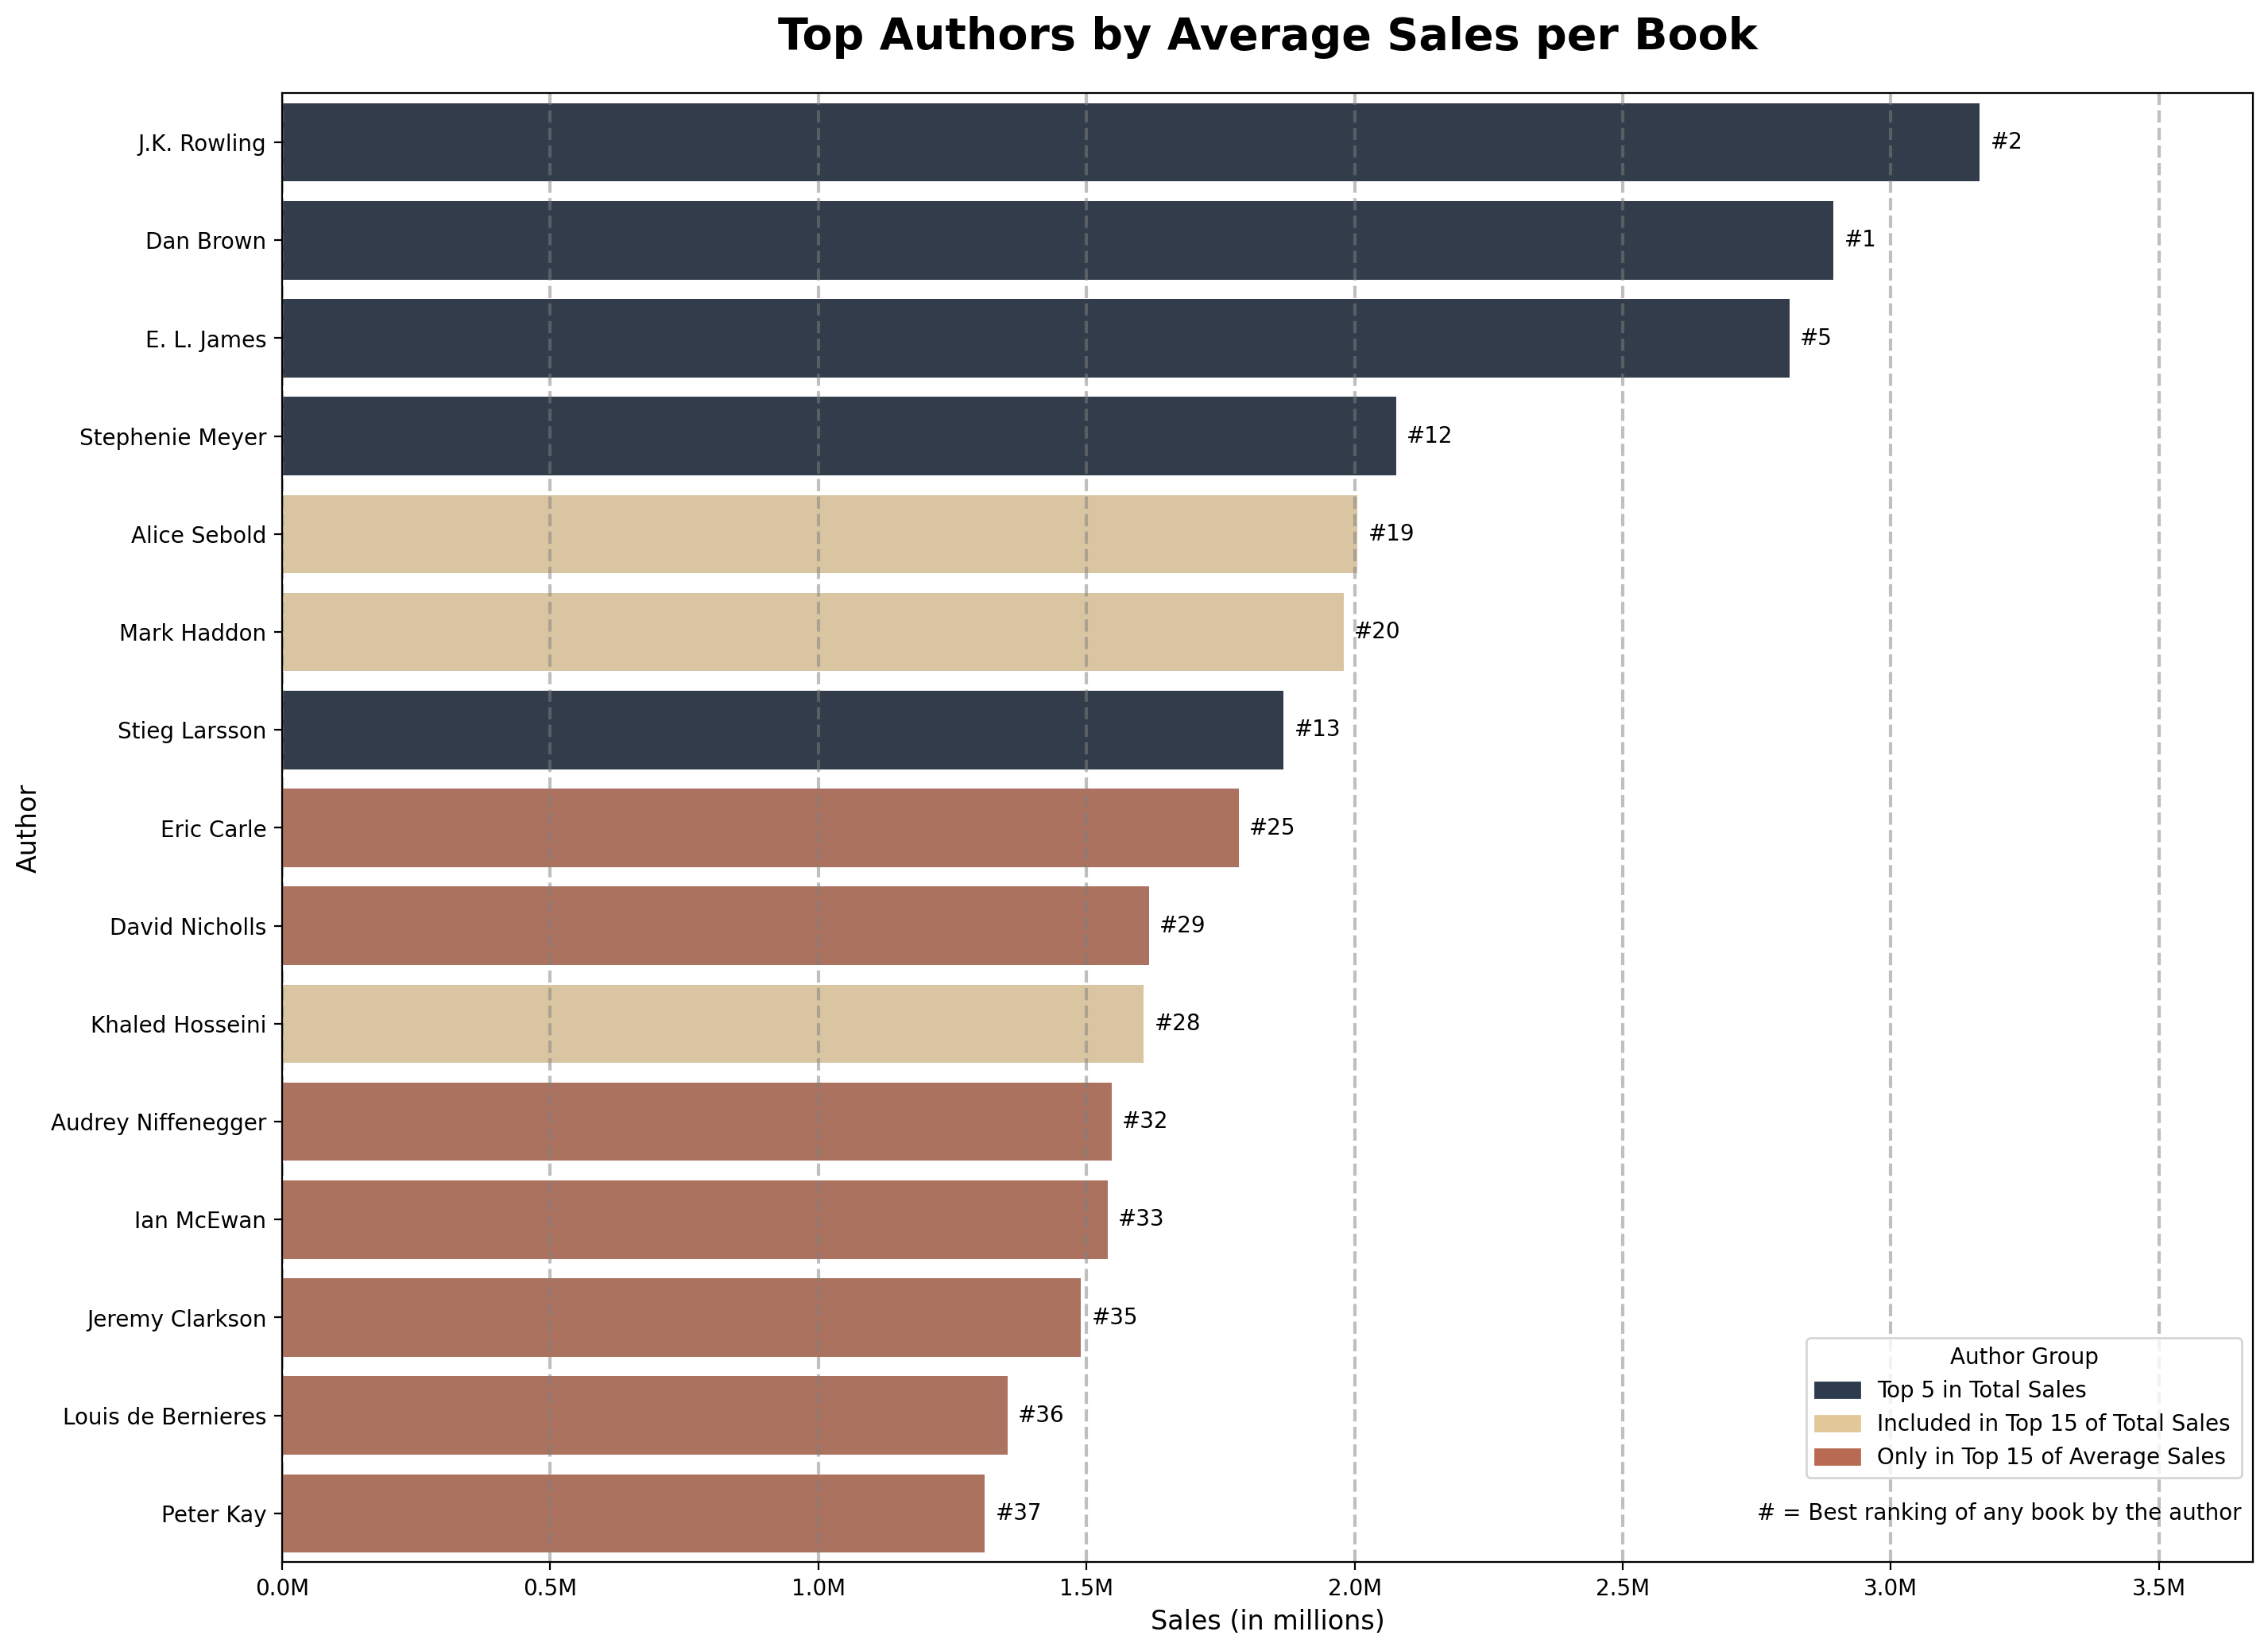

In [161]:
plt.figure(figsize = (16,12), dpi = 200)
#top_5_avg_threshold = author_data.sort_values(by='avg_sales_per_book', ascending=False).head(5).avg_sales_per_book

author_data['new_top_15_avg'] = author_data.full_name.apply(lambda x: False if x in list(top_auth_sale_sorted.full_name) else True)

# Sort author_data by volume sales, only keeping the top 15
top_auth_avg_sorted = author_data.sort_values(by = 'avg_sales_per_book', ascending = False).head(15).reset_index(drop = True)

top_auth_avg_sorted['color'] = top_auth_avg_sorted.apply(lambda row: classic_palette[0] if (row['top_5_sales'] == True and row['top_15_avg'] == True) else classic_palette[1] if (row['top_5_sales'] == False and row['new_top_15_avg'] == True) else classic_palette[5], axis = 1)
# Assign color based on value of top_5_sales column
#palette = {False: classic_palette[5], True: classic_palette[0]}

# Plot bar graph with top 15 authors in terms of volume sales
top15_avg_bar = sns.barplot(data = top_auth_avg_sorted, y = 'full_name', x = 'avg_sales_per_book', hue = 'full_name', palette= dict(zip(top_auth_avg_sorted.full_name, top_auth_avg_sorted.color)), legend = False)

# Annotate top rank
for index, row in top_auth_avg_sorted.iterrows():
    top15_avg_bar.text(row['avg_sales_per_book'] + 0.2e5, index, f"#{row['best_rank']}", va='center', fontsize=10, color="black")
top15_avg_bar.text(2.75e6, 14, f'# = Best ranking of any book by the author', va = 'center')        

top15_avg_bar.set_title('Top Authors by Average Sales per Book', fontsize = 20, fontweight = 'bold', pad = 20)
top15_avg_bar.set_xlabel('Sales (in millions)', fontsize = 12)
top15_avg_bar.set_ylabel('Author', fontsize = 12)

legend_patches = [mpatches.Patch(color = classic_palette[0], label = 'Top 5 in Total Sales'), 
                  mpatches.Patch(color = classic_palette[5], label = 'Included in Top 15 of Total Sales'),
                  mpatches.Patch(color = classic_palette[1], label = 'Only in Top 15 of Average Sales ')]
top15_avg_bar.legend(handles = legend_patches, title = 'Author Group', loc = 'lower right', bbox_to_anchor = (1.0, 0.05))
top15_avg_bar.xaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))
xticks = plt.xticks()[0]
for xtick in xticks:
    plt.axvline(x=xtick, color='gray', linestyle='dashed', alpha=0.5)  # Add lines at x-tick positions

plt.show()

The top four authors in total sales remained in their positions, though the gap between the top two is significantly smaller. J.K. Rowling's average book sales were 3.2 million, while Dan Brown's average was 2.9 million per book. There was a substantial shift after that. Alice Sebold and Mark Haddon were near the bottom of the top 15 in total sales but now rank fifth and sixth in average sales, respectively, coming between Stieg Larsson's and the others in the top five. 

Notably, nearly half of the authors featured in this graph did not appear on the graph for the top 15 in total sales. Further, the best-ranked book for each author seems to align more with their performance in average sales. Compared to the previous graph, this one better represents the success of these best-selling authors because it takes into account the number of books on the list.

Let's look at the relationship between the number of books on the top 100 best-sellers list and the total volume of sales for each books. We will highlight authors with high average sales per book

In [34]:
author_book_sales_corr, p_value = stats.pearsonr(author_data.num_books, author_data.best_rank)
p_value

6.978739793087674e-07

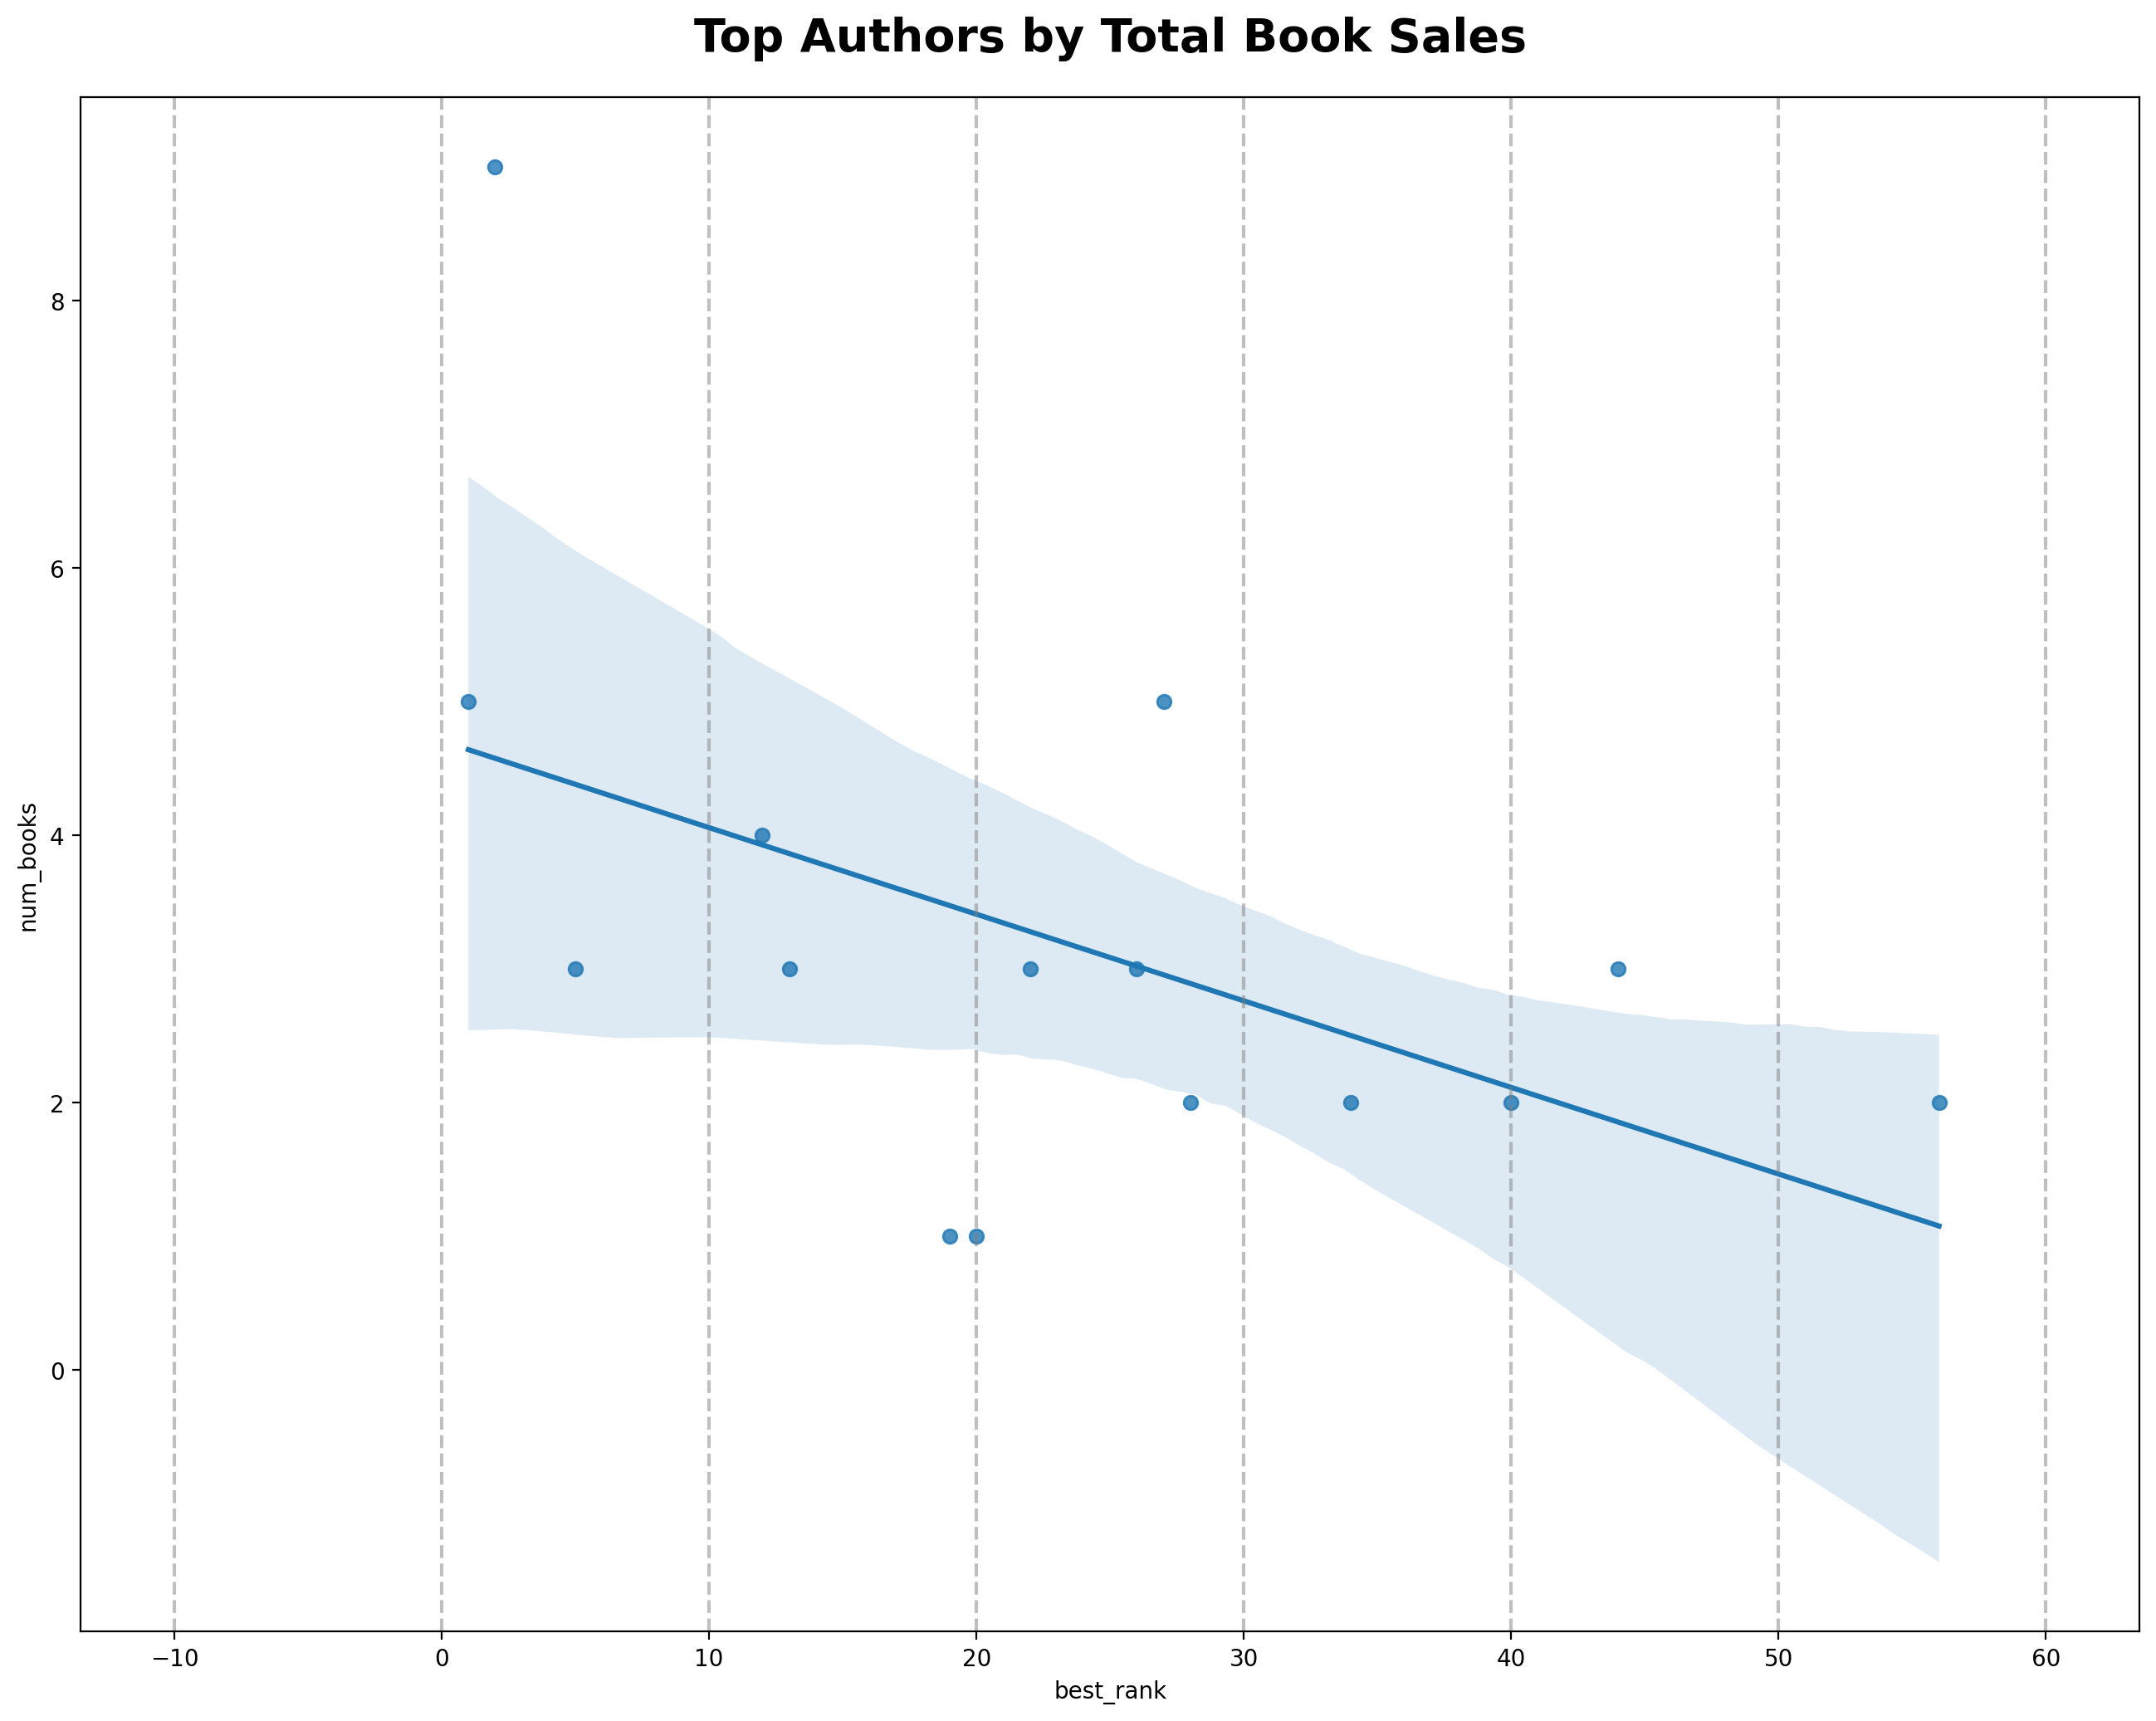

In [36]:
plt.figure(figsize = (16,12), dpi = 200)

# Assign each author True if volume sales meets or is above 5,000,000, False if not
#author_data['top_5_sales'] = author_data.volume_sales.apply(lambda x: True if x >= 5000000 else False)

# Sort author_data by volume sales, only keeping the top 15
#top_auth_sale_sorted = author_data.sort_values(by = 'volume_sales', ascending = False).head(15).reset_index(drop = True)

# Assign color based on value of top_5_sales column
palette = {False: classic_palette[5], True: classic_palette[0]}

# Plot bar graph with top 15 authors in terms of volume sales
top5_bar = sns.regplot(data = top_auth_sale_sorted, x = 'best_rank', y = 'num_books')

# for index, row in top_auth_sale_sorted.iterrows():
#     top5_bar.text(
#         row['volume_sales'] + 0.2e6,  # Small offset to avoid overlapping the bar
#         index, 
#         f"Highest Rank: {row['best_rank']}", 
#         va='center', 
#         fontsize=10, 
#         color="black"
#     )
top5_bar.set_title('Top Authors by Total Book Sales', fontsize = 20, fontweight = 'bold', pad = 20)
#top5_bar.set_xlabel('Sales (in millions)', fontsize = 12)
#top5_bar.set_ylabel('Author', fontsize = 12)
#top5_bar.xaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))
xticks = plt.xticks()[0]
for xtick in xticks:
    plt.axvline(x=xtick, color='gray', linestyle='dashed', alpha=0.5)  # Add lines at x-tick positions

plt.show()

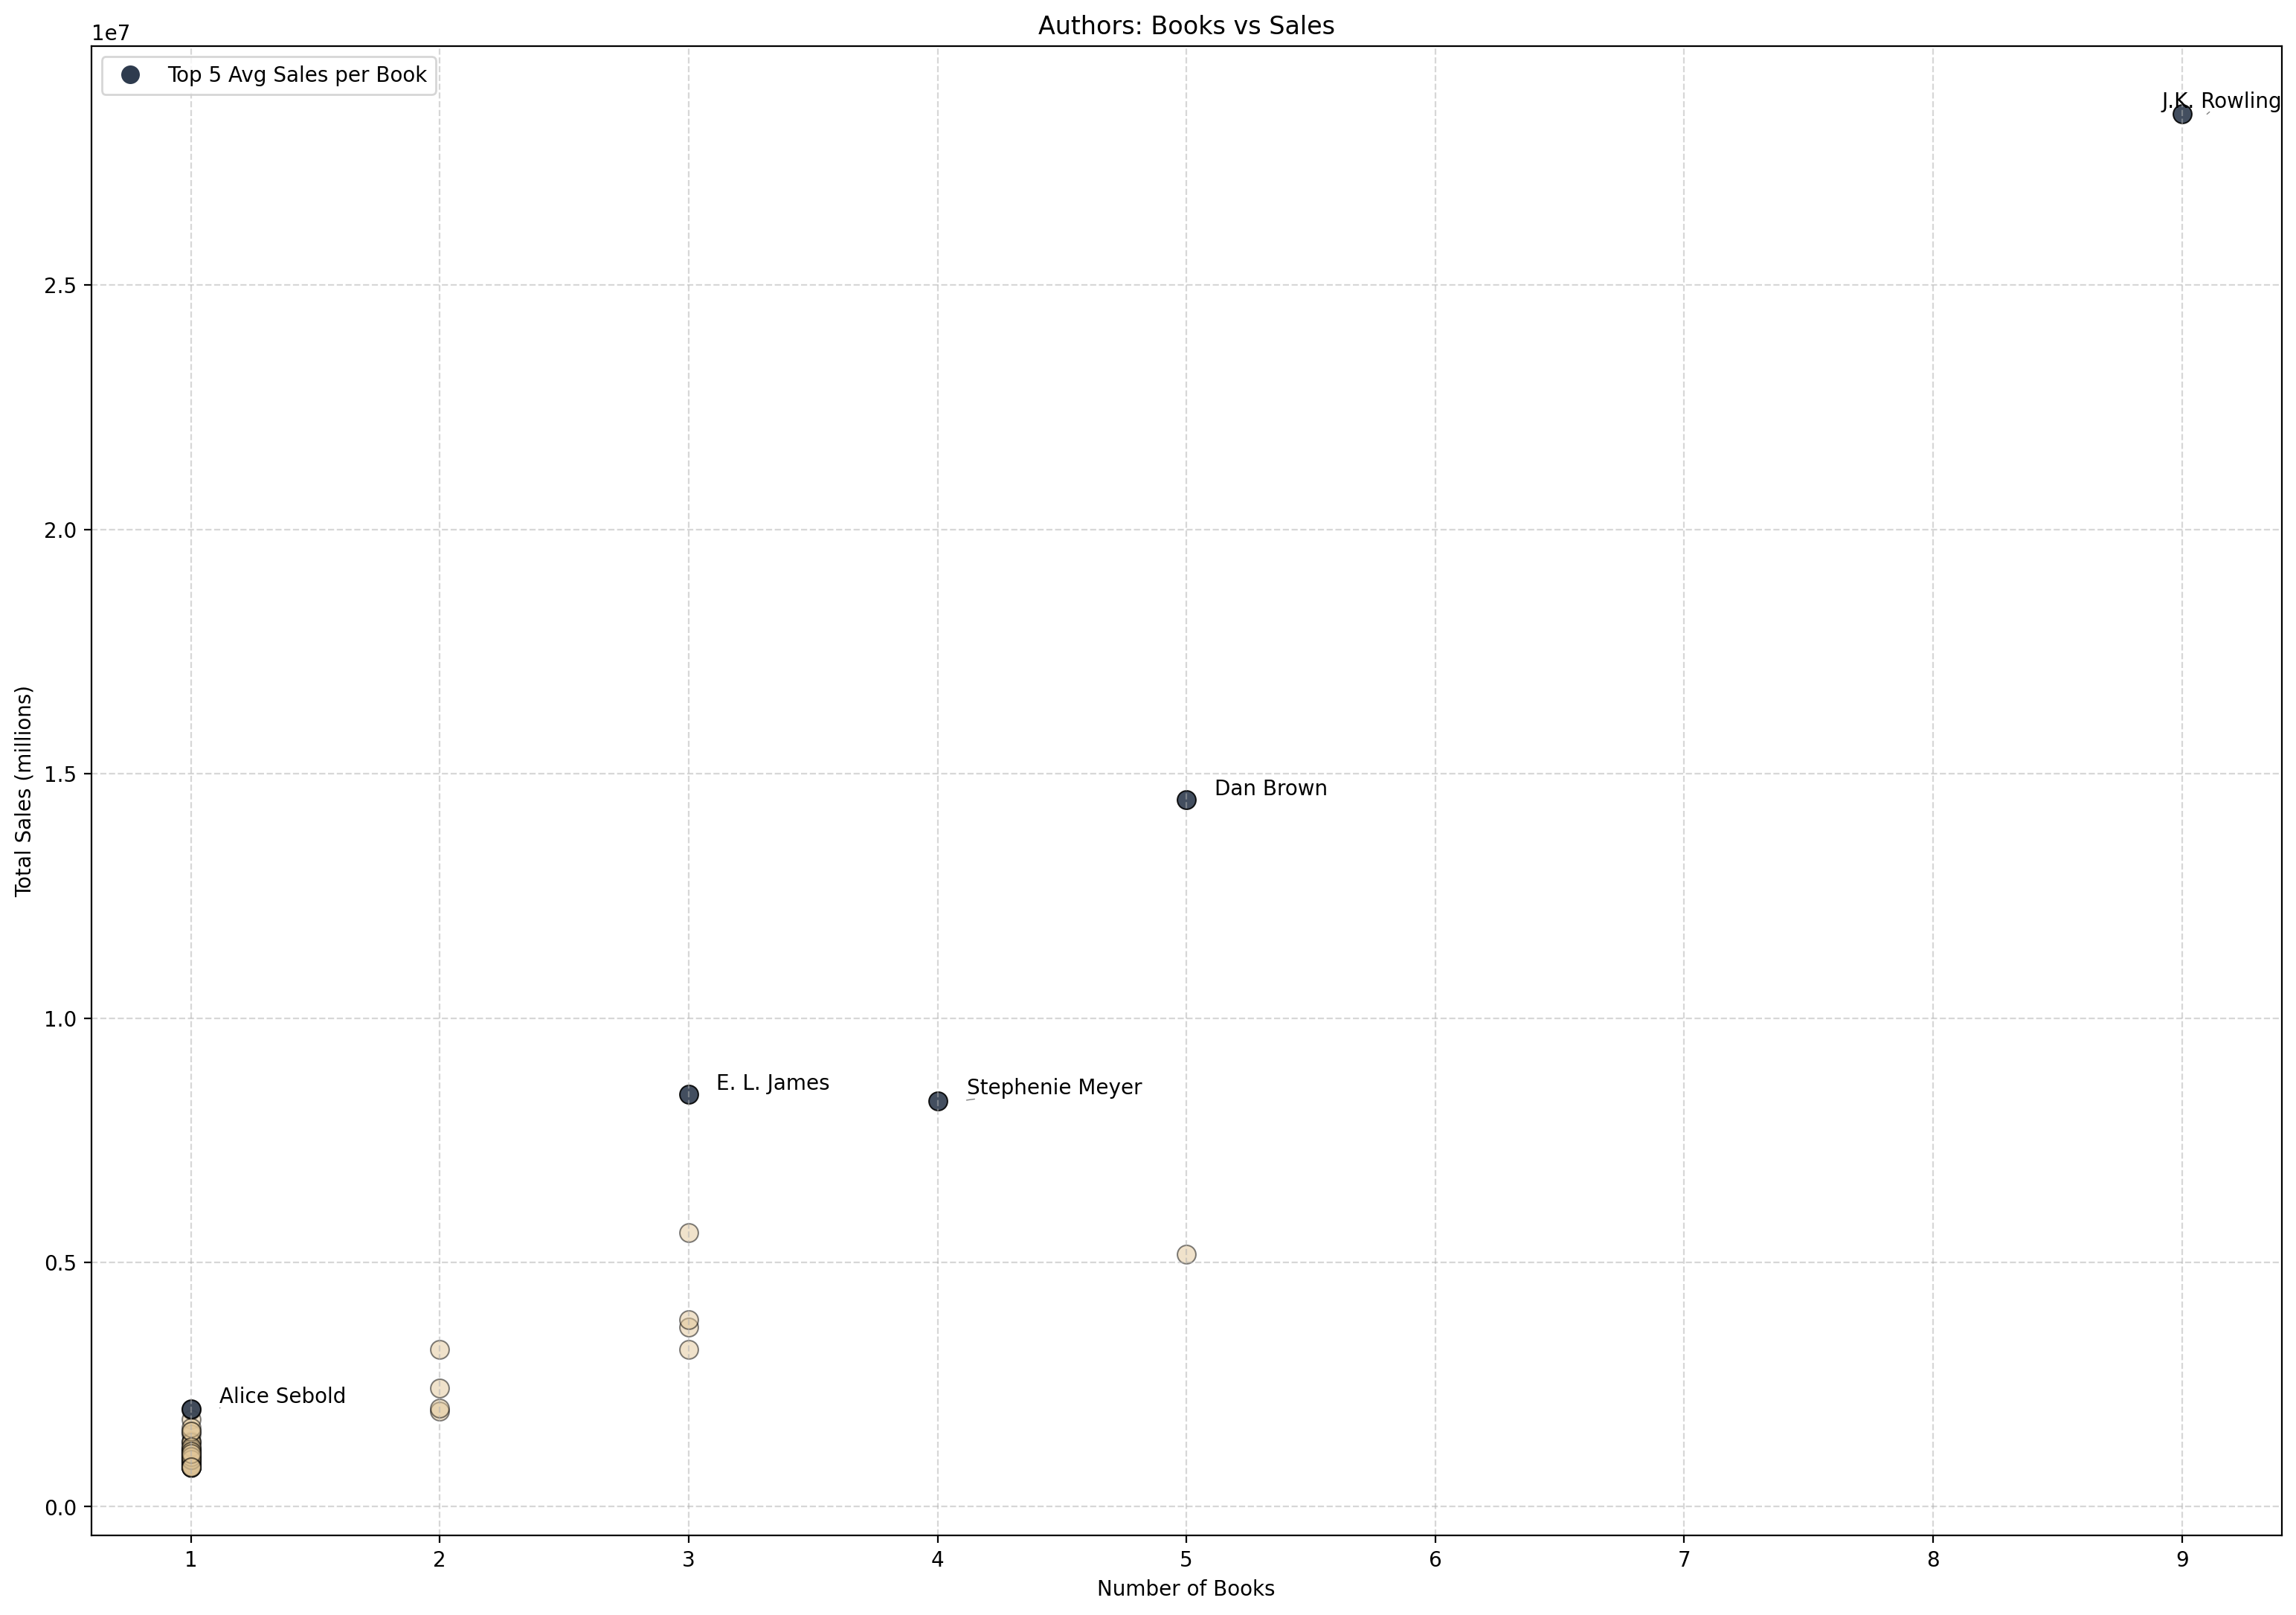

In [56]:
plt.figure(figsize = (19,13), dpi = 200)

top_5_avg_threshold = author_data.sort_values(by='avg_sales_per_book', ascending=False).head(5).avg_sales_per_book
top_10_avg_threshold = author_data.sort_values(by='avg_sales_per_book', ascending=False).head(10).avg_sales_per_book
author_data['top_5_avg'] = author_data.avg_sales_per_book.apply(lambda x: True if x >= top_5_avg_threshold.min() else False)
author_data['top_10_avg'] = author_data.avg_sales_per_book.apply(lambda x: True if x >= top_10_avg_threshold.min() else False)

palette = {False: classic_palette[5], True: classic_palette[0]}
# Define alpha values for each category
alpha_values = {False: 0.5, True: 0.9}
for top_5_category in author_data.top_5_avg.unique():
    subset = author_data[author_data.top_5_avg == top_5_category]
    sns.scatterplot(data = subset, x = 'num_books', y = 'volume_sales', 
    color = palette[top_5_category], 
    edgecolor='black', 
    s=80, alpha = alpha_values[top_5_category]
    )

# Annotate high volume sales outliers
#for index, row in author_data[author_data.top_10_avg == True].sort_values(by = 'volume_sales', ascending = False).reset_index(drop = True).iterrows():
    #if row['num_books'] == 1:
    #    plt.text(row['num_books'] + 0.1, row['volume_sales'] + 500000, row['full_name'], fontsize=9, ha='left')
    #plt.text(row['num_books'],  row['volume_sales'],   author_name,   fontsize=10,   ha='right',  color='red')
    #plt.text(row['num_books'] + 0.1, row['volume_sales'] + (index * 50000), row['full_name'])
    
    #plt.text(row['num_books'] + 0.1, row['volume_sales'] + 500000, row['full_name'], fontsize=9, ha='left')
annotations = []
for index, row in author_data[author_data.top_5_avg == True].iterrows():
    annotations.append(plt.text(row['num_books'] + 0.1, row['volume_sales'], row['full_name'], fontsize=10))

# Adjust text to avoid overlapping
adjust_text(annotations, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))
# Customizations
plt.xlabel("Number of Books")
plt.ylabel("Total Sales (millions)")
plt.title("Authors: Books vs Sales")

legend_labels = {
    palette[True]: "Top 5 Avg Sales per Book",
}
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
    for color, label in legend_labels.items()
]
plt.legend(handles=handles, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
#plt.xticks(rotation=45)

plt.show()

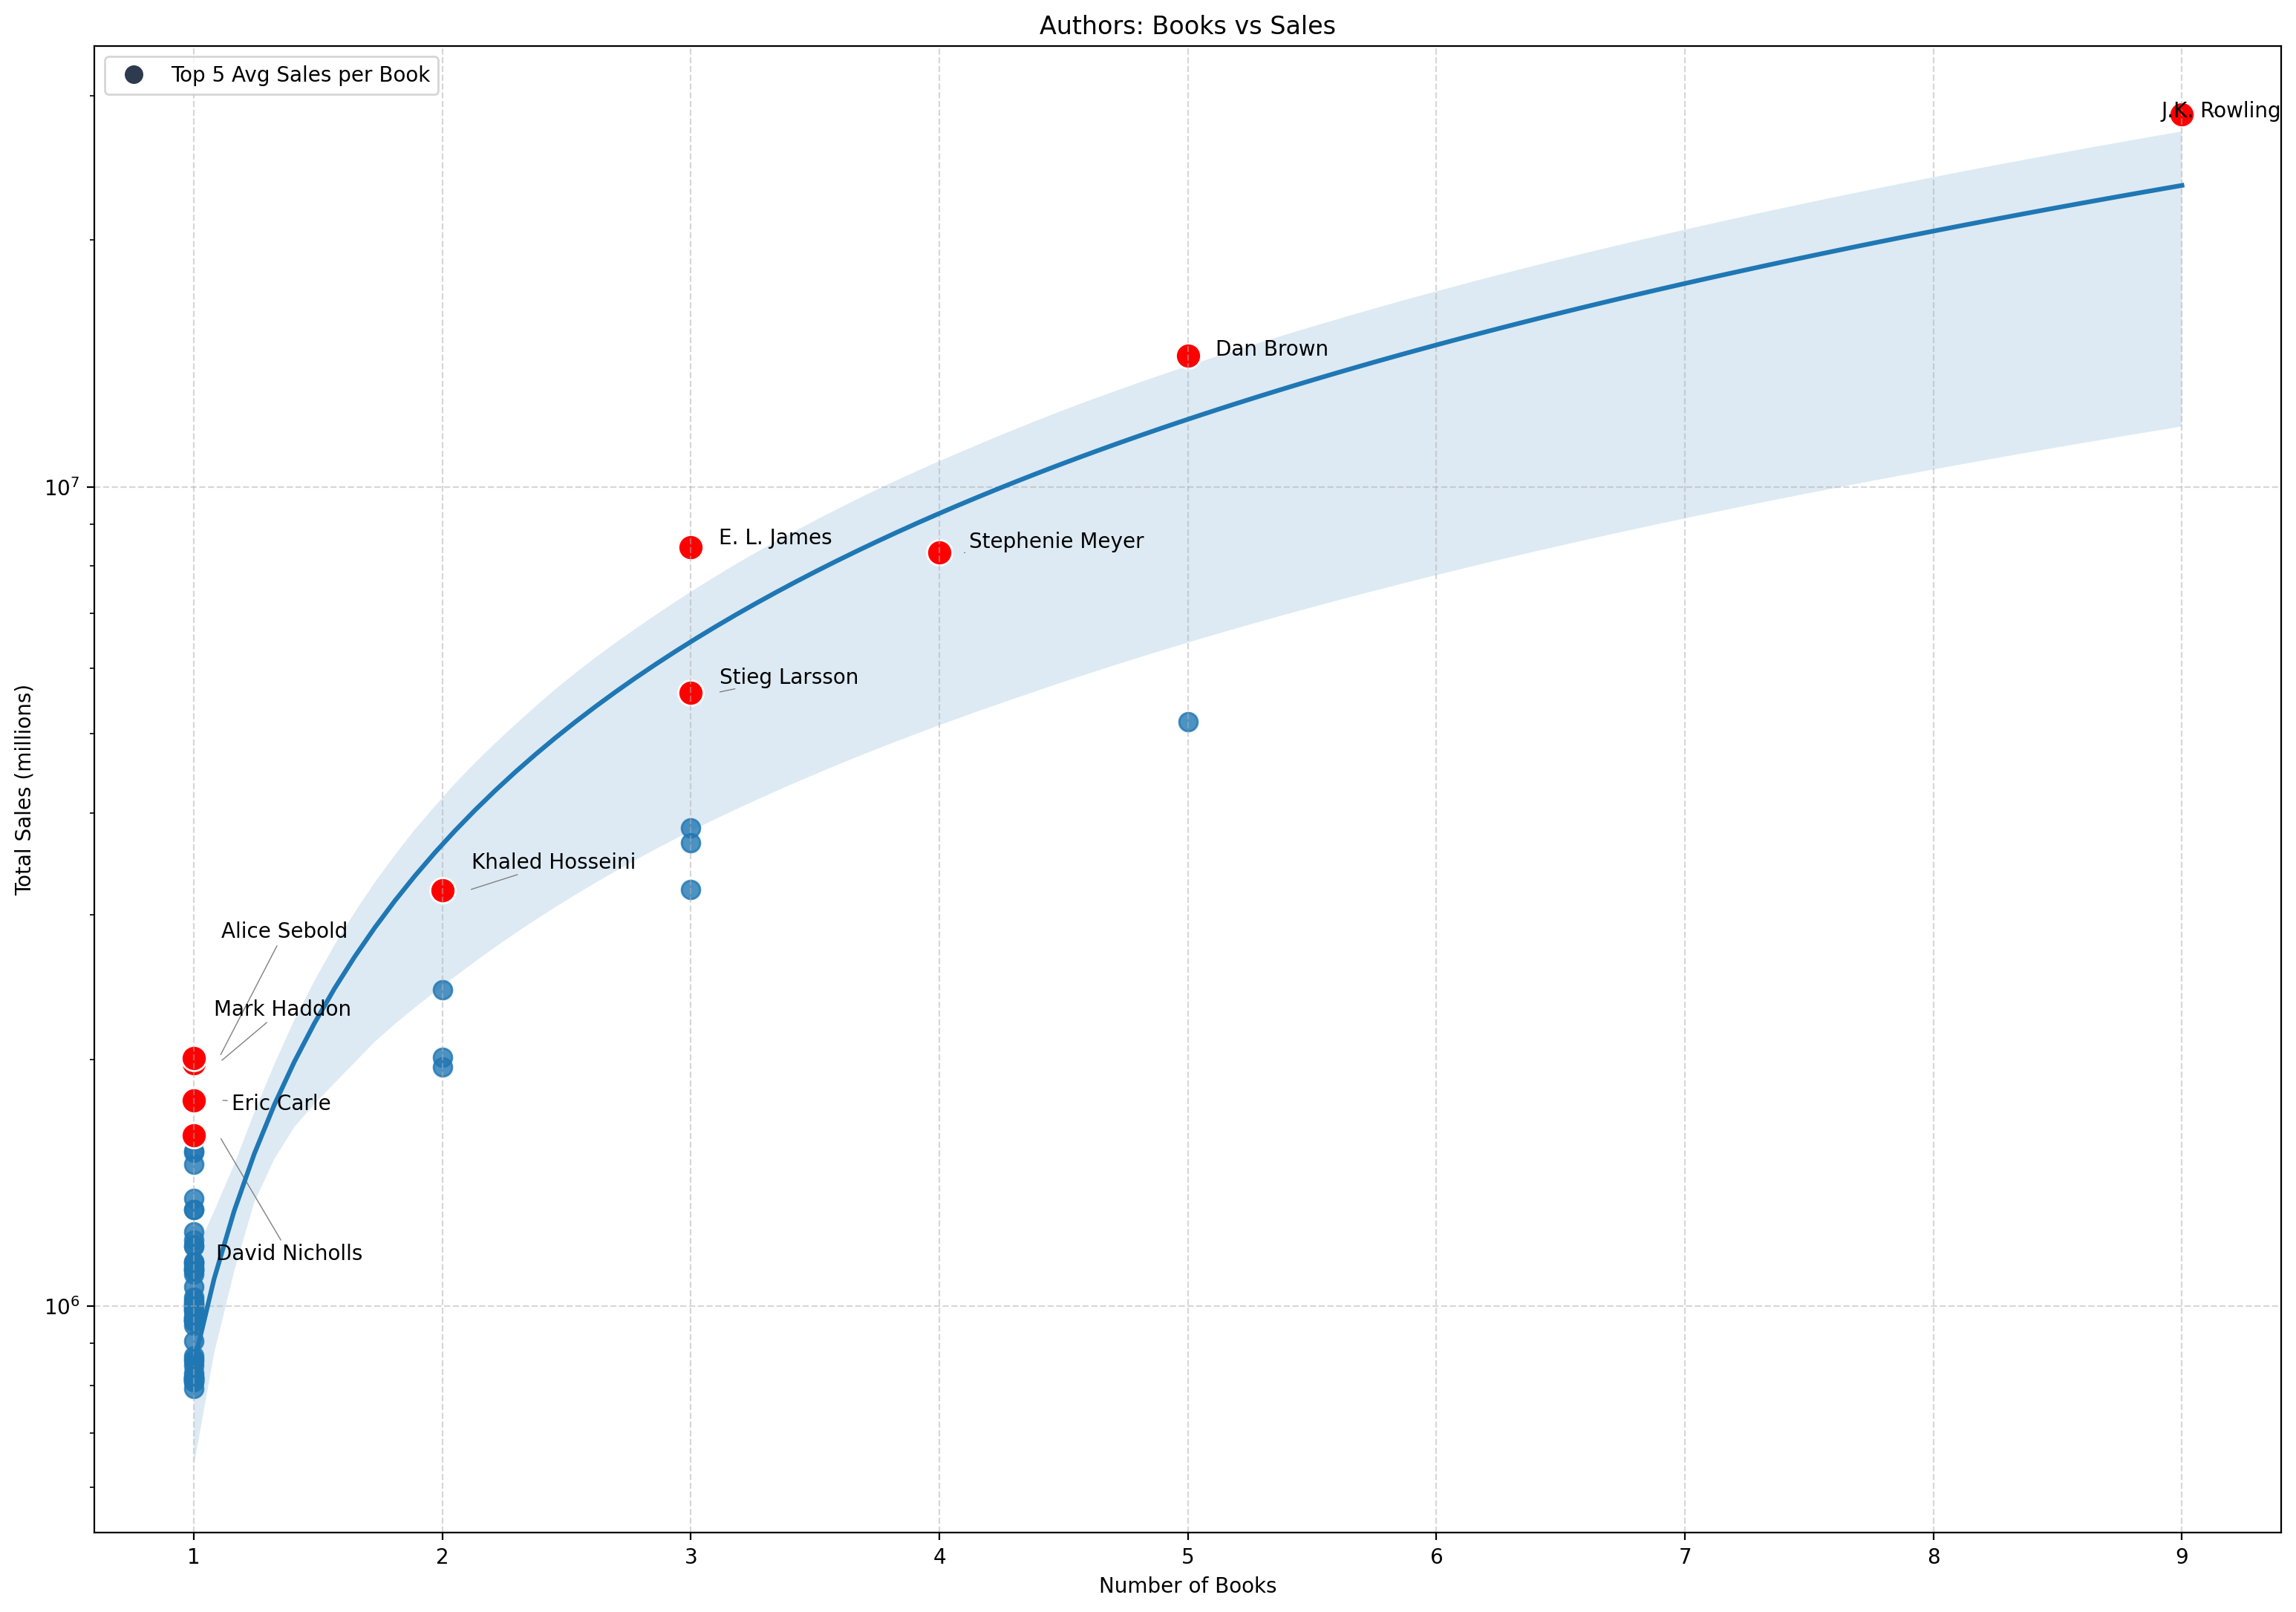

In [47]:
plt.figure(figsize = (19,13), dpi = 200)

top_5_avg_threshold = author_data.sort_values(by='avg_sales_per_book', ascending=False).head(5).avg_sales_per_book
top_10_avg_threshold = author_data.sort_values(by='avg_sales_per_book', ascending=False).head(10).avg_sales_per_book
author_data['top_5_avg'] = author_data.avg_sales_per_book.apply(lambda x: True if x >= top_5_avg_threshold.min() else False)
author_data['top_10_avg'] = author_data.avg_sales_per_book.apply(lambda x: True if x >= top_10_avg_threshold.min() else False)

palette = {False: classic_palette[5], True: classic_palette[0]}
# Define alpha values for each category
alpha_values = {False: 0.5, True: 0.9}
# for top_5_category in author_data.top_10_avg.unique():
#     subset = author_data[author_data.top_10_avg == top_5_category]
#     sns.scatterplot(data = subset, x = 'num_books', y = 'volume_sales', 
#     color = palette[top_5_category], 
#     edgecolor='black', 
#     s=80, alpha = alpha_values[top_5_category]
#     )
sns.regplot(data = author_data, x = 'num_books', y = 'volume_sales', scatter_kws = {'s': 80})
sns.scatterplot(data = author_data[author_data.top_10_avg == True], x = 'num_books', y = 'volume_sales', s = 150, color = 'red')
annotations = []
for index, row in author_data[author_data.top_10_avg == True].iterrows():
    annotations.append(plt.text(row['num_books'] + 0.1, row['volume_sales'], row['full_name'], fontsize=10))

# Adjust text to avoid overlapping
adjust_text(annotations, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))
# Customizations
plt.xlabel("Number of Books")
plt.ylabel("Total Sales (millions)")
plt.title("Authors: Books vs Sales")

legend_labels = {
    palette[True]: "Top 5 Avg Sales per Book",
}
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
    for color, label in legend_labels.items()
]
plt.legend(handles=handles, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
#plt.xticks(rotation=45)
#plt.xscale('log')
plt.yscale('log')

plt.show()

In [50]:
import statsmodels.api as sm

# Prepare data
X = author_data['num_books']
y = author_data['volume_sales']

# Add constant for intercept
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X).fit()

# Get predicted values
author_data['predicted_sales'] = model.predict(X)

# Calculate residuals
author_data['residuals'] = author_data['volume_sales'] - author_data['predicted_sales']

# Display authors with highest residuals (biggest over/underperformers)
author_data[['author', 'num_books', 'volume_sales', 'predicted_sales', 'residuals']].sort_values(
    by='residuals', ascending=False
).head(10)


,author,num_books,volume_sales,predicted_sales,residuals
55,"Rowling, J.K.",9,28494745,2.332776e+07,5.166982e+06
7,"Brown, Dan",5,14462827,1.208933e+07,2.373497e+06
29,"James, E. L.",3,8432648,6.470114e+06,1.962534e+06
57,"Sebold, Alice",1,2005598,8.508974e+05,1.154701e+06
22,"Haddon, Mark",1,1979552,8.508974e+05,1.128655e+06
9,"Carle, Eric",1,1783535,8.508974e+05,9.326376e+05
46,"Nicholls, David",1,1616068,8.508974e+05,7.651706e+05
47,"Niffenegger, Audrey",1,1546886,8.508974e+05,6.959886e+05
39,"McEwan, Ian",1,1539428,8.508974e+05,6.885306e+05
10,"Clarkson, Jeremy",1,1489403,8.508974e+05,6.385056e+05


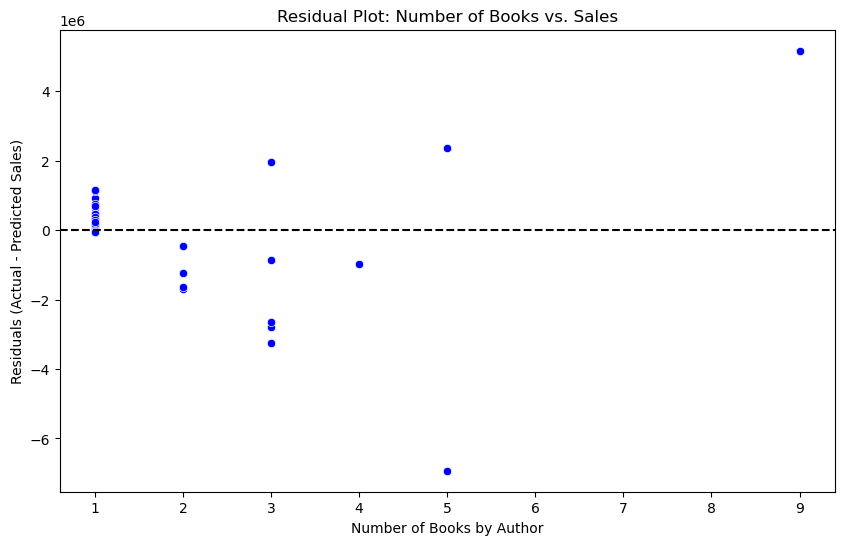

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=author_data['num_books'], y=author_data['residuals'], color='blue')
plt.axhline(y=0, color='black', linestyle='--')  # Regression baseline
plt.xlabel("Number of Books by Author")
plt.ylabel("Residuals (Actual - Predicted Sales)")
plt.title("Residual Plot: Number of Books vs. Sales")
plt.show()


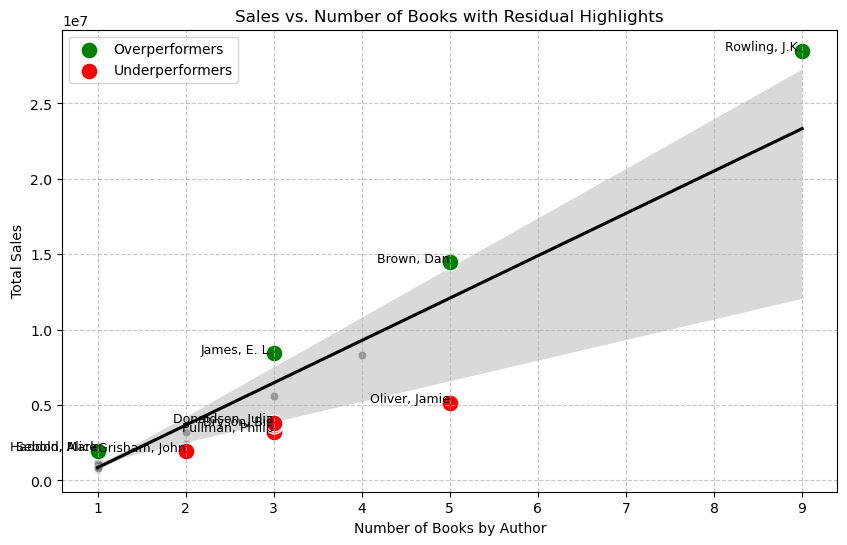

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=author_data['num_books'], y=author_data['volume_sales'], color='gray', alpha=0.6)

# Plot regression line
sns.regplot(x=author_data['num_books'], y=author_data['volume_sales'], scatter=False, color="black")

# Highlight authors with largest positive & negative residuals
top_overperformers = author_data.nlargest(5, 'residuals')
top_underperformers = author_data.nsmallest(5, 'residuals')

sns.scatterplot(x=top_overperformers['num_books'], y=top_overperformers['volume_sales'], color='green', s=150, label="Overperformers")
sns.scatterplot(x=top_underperformers['num_books'], y=top_underperformers['volume_sales'], color='red', s=150, label="Underperformers")

# Annotate authors
for _, row in pd.concat([top_overperformers, top_underperformers]).iterrows():
    plt.text(row['num_books'], row['volume_sales'], row['author'], fontsize=9, ha='right')

plt.xlabel("Number of Books by Author")
plt.ylabel("Total Sales")
plt.title("Sales vs. Number of Books with Residual Highlights")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
author_data[author_data.top_10_avg == True].sort_values(by = 'volume_sales', ascending = False).reset_index(drop = True)

In [ ]:
sns.kdeplot(data = author_data, x = 'volume_sales')
plt.show()

# Check skewness
print("Skewness of Sales Data:", author_data['volume_sales'].skew())

Since skewness is high (e.g., > 1.0), we will be using a log scale for our scatterplot.

In [ ]:
top_5_avg_sales.sort_values(by = 'volume_sales', ascending = False)

In [ ]:
auth_sale_sorted.head()

In [ ]:
auth_sale_sorted.sort_values(by = 'avg_sales_per_book', ascending = False).head(10)

### Is there a correlation between the number of books an publisher or author has in the top 100 and their total sales?

To determine the relationship between the number of books a publisher or author has in the top 100 and their total sales, we will calculate the correlation coefficient and visualize the data using scatterplots with regression lines.



A high correlation would suggest that having multiple bestsellers significantly impacts total sales, while a low correlation might indicate that sales depend more on other factors

In [45]:
author_book_sales_corr, p_value = stats.pearsonr(author_data.num_books, author_data.volume_sales)
publisher_book_sales_corr, p_value = stats.pearsonr(publisher_data.num_books, publisher_data.volume_sales)

NameError: name 'publisher_book_sales_corr' is not defined

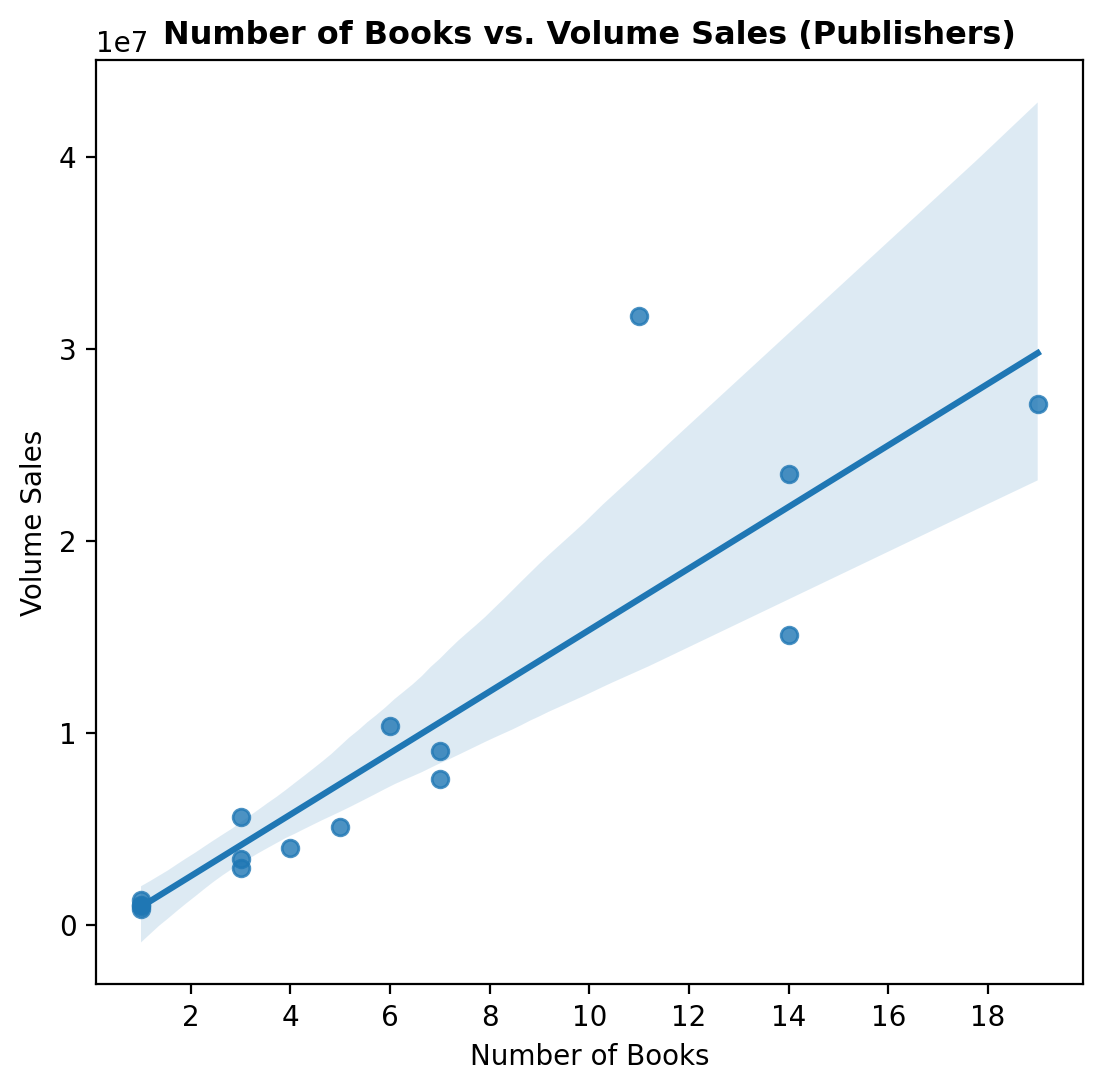

In [28]:
plt.figure(figsize = (14,6), dpi = 200)

# Plot regression graph with the number of books vs volume sales for each publisher
publish_scatter = plt.subplot(1, 2, 1)
sns.regplot(data = publisher_data, x = 'num_books', y = 'volume_sales')

publish_scatter.set_title('Number of Books vs. Volume Sales (Publishers)', fontsize = 11.5, fontweight = 'bold')
publish_scatter.set_ylabel('Volume Sales', fontsize = 10)
publish_scatter.set_xlabel('Number of Books', fontsize = 10)
publish_scatter.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.text(x = publisher_data.num_books.max() * 0.5, y = publisher_data.volume_sales.max() * 1.15, s = f'Correlation: {publisher_book_sales_corr:.2f}', fontsize = 12)

# Plot regression graph with the number of books vs volume sales for each author
author_scatter = plt.subplot(1, 2, 2)
sns.regplot(data = author_data, x = 'num_books', y = 'volume_sales')

author_scatter.set_title('Number of Books vs. Volume Sales (Authors)', fontsize = 11.5, fontweight = 'bold')
author_scatter.set_ylabel('Volume Sales', fontsize = 10)
author_scatter.set_xlabel('Number of Books', fontsize = 10)
author_scatter.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
author_scatter.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
author_scatter.yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))
plt.text(x = author_data.num_books.max() * 0.55, y = author_data.volume_sales.max() * .85, s = f'Correlation: {author_book_sales_corr:.2f}', fontsize = 12)

plt.show()

In [ ]:
plt.figure(figsize = (14,6), dpi = 200)

# Plot regression graph with the number of books vs volume sales for each publisher
top_authors = author_data.sort_values(by='avg_sales_per_book', ascending=False).head(10)
sns.barplot(data=top_authors, x='author', y='avg_sales_per_book')
plt.xticks(rotation=45)
plt.title('Top Authors by Average Sales per Book')
plt.show()

The results show a strong positive correlation between the number of books and total sales for both publishers (0.89) and authors (0.94). This suggests that, in general, having more best-selling books contributes to higher total sales.

### Sales Distribution across Books

### Top-selling Books by Publisher

In [ ]:
publisher_data

In [ ]:
publisher_data.set_index('publisher_abbrev').plot(kind = 'bar', stacked = True, color= ['steelblue', 'red'])

### Sales Trend by Genre

In [ ]:
plt.figure(figsize = (16,12), dpi = 200)

sns.boxplot(data = books, x = 'general_genre', y = 'volume_sales')

plt.xticks(rotation = -20) 
plt.show()

### Author Contribution to Sales

### Cumulative Sales by Rank

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 5), dpi=200)

# Bar plot for the number of books (primary y-axis)
sns.barplot(data=author_data, x='author', y='num_books', color='skyblue', ax=ax1, label='Number of Books')

# Create a secondary y-axis for total sales
ax2 = ax1.twinx()
sns.lineplot(data = author_data, x='author', y='volume_sales', color='red', marker='o', ax=ax2, label='Total Sales')

# Labels and title
ax1.set_xlabel("Author")
ax1.set_ylabel("Number of Books", color='skyblue')
ax2.set_ylabel("Total Sales", color='red')
plt.title("Number of Books by Author & Their Total Sales")

# Rotate x-axis labels for readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=-85, ha='left')

# Show the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [ ]:
plt.figure(figsize = (12,5), dpi = 200)
sns.boxplot(data = books, x = 'parent_company', y = 'volume_sales')
plt.show()

In [ ]:
publisher_sales = books.groupby('parent_company').volume_sales.sum().sort_values(ascending = False).reset_index()

sns.barplot(data = publisher_sales, x = 'parent_company', y = 'volume_sales')
plt.xticks(rotation = -90)

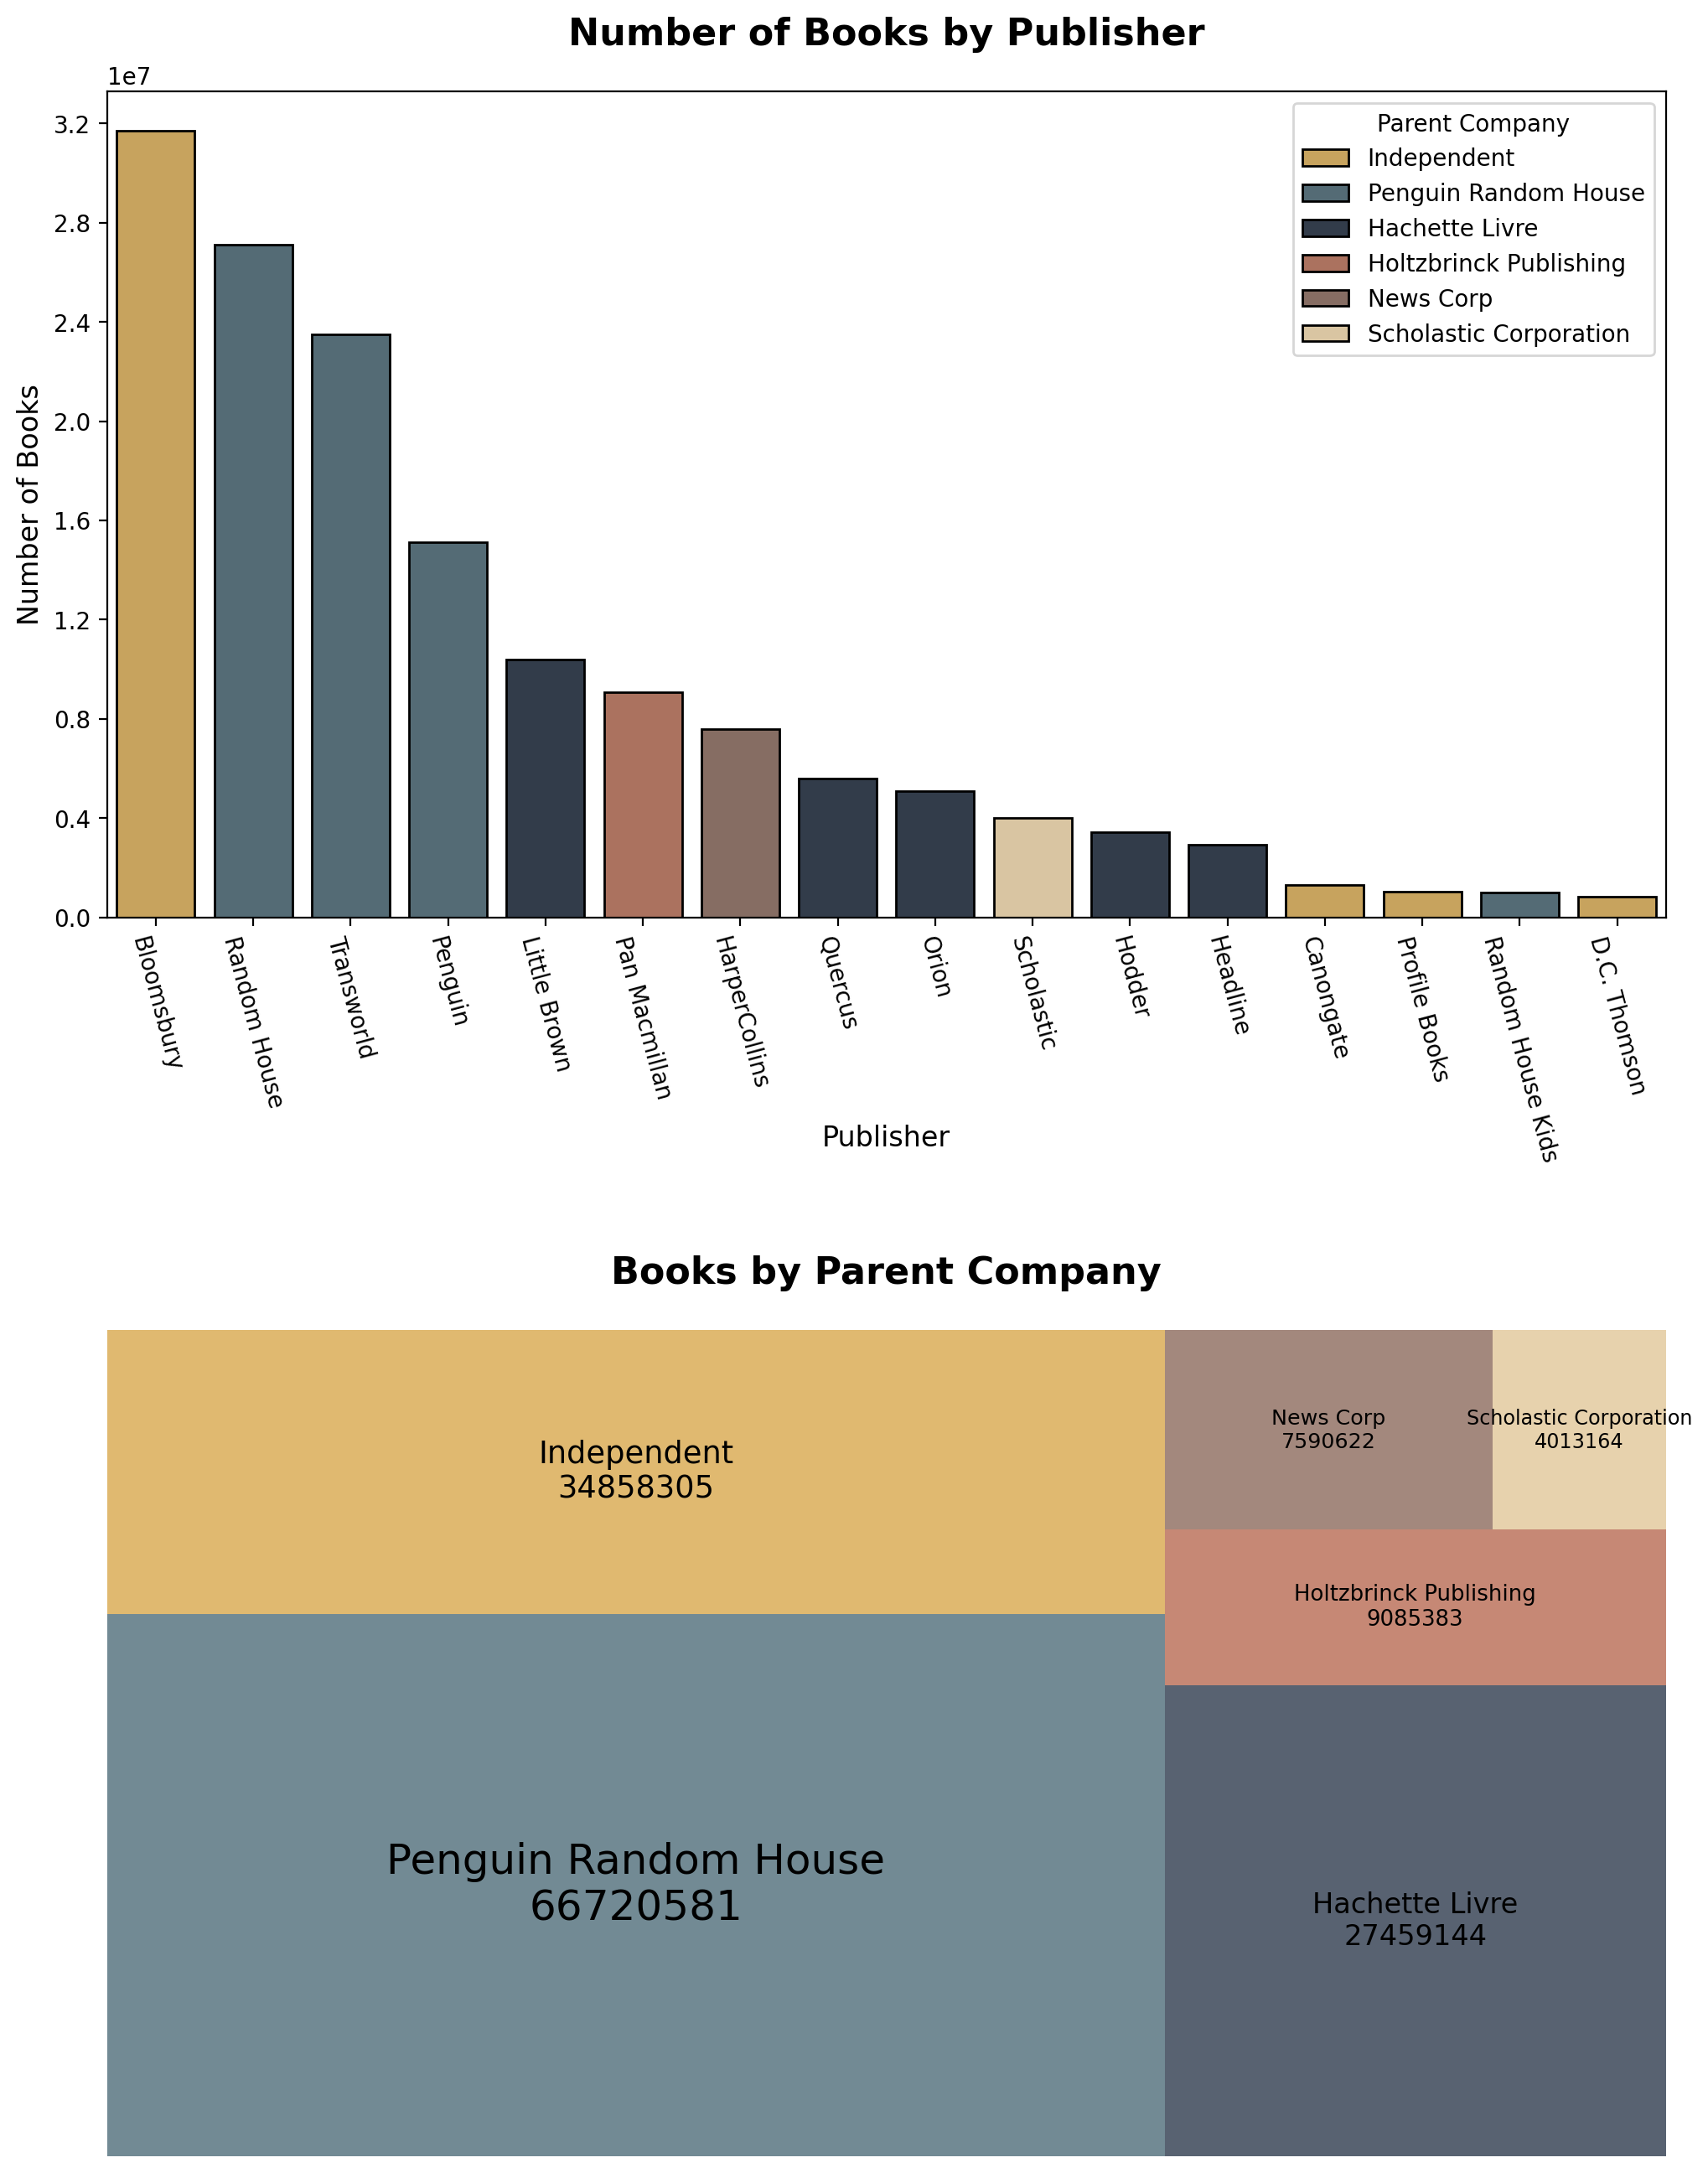

In [66]:
plt.figure(figsize = (12,16), dpi = 200)

# Sort publisher_data by volume sales
pub_sale_sorted = publisher_data.sort_values(by = 'volume_sales', ascending = False)

# Plot bar graph with the number of books each publisher has in top 100 list
publish_bar = plt.subplot(2, 1, 1)
sns.barplot(data = pub_sale_sorted, x = 'publisher_abbrev', y = 'volume_sales', hue = 'parent_company', palette = dict(zip(parent_data.parent_company, parent_data.color)), edgecolor = 'black')

publish_bar.set_title('Number of Books by Publisher', fontsize = 16, fontweight = 'bold', pad = 20)
publish_bar.set_ylabel('Number of Books', fontsize = 12)
publish_bar.set_xlabel('Publisher', fontsize = 12)
publish_bar.xaxis.set_label_coords(0.5, -0.25)
publish_bar.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
publish_bar.legend(title = 'Parent Company')
plt.xticks(rotation = -75)

# Sort parent_data by volume sales
par_sale_sorted = parent_data.sort_values(by = 'volume_sales', ascending = False)

# Plot squarify chart with the number of books each parent company has in top 100
parent_squarify = plt.subplot(2, 1, 2)

# Generate labels with company name + number of books
labels = [f"{company}\n{num}" for company, num in zip(par_sale_sorted.parent_company, par_sale_sorted.volume_sales)]

# Create squiarify chart
parent_squarify = squarify.plot(sizes = par_sale_sorted.volume_sales, label = labels, color = par_sale_sorted.color, alpha = 0.8)

# Scale fontsize based on number of books from each company
min_font = 8  # Minimum font size
max_font = 18  # Maximum font size
scaled_fontsizes = min_font + (par_sale_sorted.volume_sales / par_sale_sorted.volume_sales.max()) * (max_font - min_font) # Scale based on number of books
for i, text in enumerate(parent_squarify.texts):
    text.set_fontsize(scaled_fontsizes.iloc[i]) 

parent_squarify.set_title('Books by Parent Company', fontsize = 16, fontweight = 'bold', pad = 20)    
parent_squarify.axis('off')

plt.subplots_adjust(hspace = 0.5)
plt.show()